# Labs 2

## Przygotuj program generujący następujące zbiory punktów na płaszczyźnie (współrzędne rzeczywiste typu double):
    a) zawierający 100 losowo wygenerowanych punktów o współrzędnych z przedziału [-100, 100],
    b) zawierający 100 losowo wygenerowanych punktów leżących na okręgu o środku (0,0) i promieniu R=10,
    c) zawierający 100 losowo wygenerowanych punktów leżących na bokach prostokąta     o wierzchołkach (-10, 10), (-10,-10), (10,-10), (10,10),
    d) zawierający wierzchołki kwadratu (0, 0), (10, 0), (10, 10), (0, 10) oraz punkty wygenerowane losowo w sposób następujący: po 25 punktów na dwóch bokach kwadratu leżących na osiach i po 20 punktów na przekątnych kwadratu.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import seaborn as sns
from time import perf_counter
from functools import partial
%matplotlib inline
sns.set_style('darkgrid')

# Rozwiązanie

**a) 100 losowo wygenerowanych punktów o współrzędnych z przedziału [-100, 100]**

In [2]:
data_a = np.random.uniform(-100, 100, size = [100, 2])

In [3]:
data_a[:10]

array([[  0.44323701,  39.34200238],
       [ 51.23913088, -95.54715898],
       [ 78.76861091, -17.40098754],
       [-12.00202725, -73.05439807],
       [-15.63155838,  63.8568888 ],
       [-98.11631991,  74.79709911],
       [ 12.56817054,  88.21179096],
       [ 54.15024811,  54.90222901],
       [ 16.7591683 ,  79.23306661],
       [-43.39977282, -97.26427266]])

In [4]:
df_a = pd.DataFrame(data=data_a, columns=['X', 'Y'])

In [5]:
df_a.head()

,X,Y
0,0.443237,39.342002
1,51.239131,-95.547159
2,78.768611,-17.400988
3,-12.002027,-73.054398
4,-15.631558,63.856889


In [6]:
df_a.describe()

,X,Y
count,100.000000,100.000000
mean,-6.147934,-3.339809
std,60.914788,60.924662
min,-98.116320,-99.737140
25%,-57.905222,-57.530447
50%,-11.303587,-2.829599
75%,50.451308,54.272181
max,99.978826,99.673857


**b) 100 losowo wygenerowanych punktów leżących na okręgu o środku (0,0) i promieniu R=10**

In [7]:
data_b = [None for _ in range(100)]
for i in range(100):
    alpha = 2 * np.pi * np.random.random_sample()
    data_b[i] = (10 * np.cos(alpha), 10 * np.sin(alpha))

In [8]:
data_b[:10]

[(9.354133248273707, -3.5355609418507234),
 (3.522308434335546, 9.359131545897231),
 (9.386727873855913, -3.448092200358983),
 (-2.05520381991838, -9.786528355785462),
 (-3.079263456089498, 9.514101984317373),
 (1.7872794970848738, -9.838985313501592),
 (-3.0550395203921585, -9.52190808235629),
 (3.752537017001449, 9.269221430952756),
 (-2.0152895077505257, -9.794825582926459),
 (4.304527751695673, -9.026131000316902)]

In [9]:
df_b = pd.DataFrame(data=data_b, columns=['X', 'Y'])

In [10]:
df_b.head()

,X,Y
0,9.354133,-3.535561
1,3.522308,9.359132
2,9.386728,-3.448092
3,-2.055204,-9.786528
4,-3.079263,9.514102


In [11]:
df_b.describe()

,X,Y
count,100.000000,100.000000
mean,1.002449,-0.743857
std,7.168519,6.931701
min,-9.999999,-9.999936
25%,-5.190855,-7.523201
50%,1.572251,-0.635092
75%,8.204003,5.439042
max,9.997253,9.999485


**c) 100 losowo wygenerowanych punktów leżących na bokach prostokąta     o wierzchołkach (-10, 10), (-10,-10), (10,-10), (10,10)**

In [12]:
a = (-10, 10)
b = (-10, -10)
c = (10, -10)
d = (10, 10)

first_side = abs(a[1] - b[1])
second_side =  abs(b[0] - c[0])
total_range = 2 * first_side + 2 * second_side

# [0, 20] range - left side of the rectangle
# (20, 40] range - bottom side of the rectangle
# (40, 60] range - right side of the rectangle
# (60, 80] range - upper side of the rectangle

# Każdy bok ma swój przedział, dzięki temu otrzymujemy jeden duży przedział w którym
# losowany jest 1 punkt i jest przydzielany do odpowiedniego boku. Taki podział
# generowania punktów na bokach prostokąta zapewnia najlepszy rozkład
# prawdopodobieństwa dla różnych długości boków.

data_c = [a, b, c, d]
for _ in range(96):
    point = np.random.uniform(0, total_range)
    
    #left side
    if 0 <= point <= 20:
        result = (-10, point-10)
        
    # bottom side
    elif 20 < point <= 40:
        if point < 30:
            result = (point%10 - 10, -10)
        else:
            result = ((point-10) % 10, -10)
            
    # right side
    elif 40 < point <= 60:
        if point < 50:
            result = (10, point%10 - 10)
        else:
            result = (10, (point-10) % 10)
            
    # upper side
    else:
        if point < 70:
            result = (point%10 - 10, 10)
        else:
            result = ((point-10) % 10, 10)
    data_c.append(result)

In [13]:
data_c[:10]

[(-10, 10),
 (-10, -10),
 (10, -10),
 (10, 10),
 (10, -4.9510881019702),
 (-6.543128422306708, 10),
 (7.7444325815135215, -10),
 (-10, 7.482303861928354),
 (-10, 3.2313229773670127),
 (10, 8.778639737043406)]

In [14]:
df_c = pd.DataFrame(data=data_c, columns=['X', 'Y'])

In [15]:
df_c.head()

,X,Y
0,-10.0,10.000000
1,-10.0,-10.000000
2,10.0,-10.000000
3,10.0,10.000000
4,10.0,-4.951088


In [16]:
df_c.describe()

,X,Y
count,100.000000,100.000000
mean,0.987215,-0.061459
std,8.608950,8.128909
min,-10.000000,-10.000000
25%,-10.000000,-9.473756
50%,2.909904,0.693518
75%,10.000000,8.458541
max,10.000000,10.000000


**d) wierzchołki kwadratu (0, 0), (10, 0), (10, 10), (0, 10) oraz punkty wygenerowane losowo w sposób następujący: po 25 punktów na dwóch bokach kwadratu leżących na osiach i po 20 punktów na przekątnych kwadratu**

In [17]:
a = (0, 0)
b = (10, 0)
c = (10, 10)
d = (0, 10)

total_range = 2 * 10

# [0, 10] range - left side of the square (X axis)
# (10, 20] range - bottom side of the square (Y axis)

# [0, 10] range - right-upper diagonal of the square
# (10, 20) range - left-upper diagonal of the square

# Każdy bok ma swój przedział, dzięki temu otrzymujemy jeden duży przedział w którym
# losowany jest 1 punkt i jest przydzielany do odpowiedniego boku. Taki podział
# generowania punktów na bokach prostokąta zapewnia najlepszy rozkład
# prawdopodobieństwa dla różnych długości boków.

data_d = [a, b, c, d]
for _ in range(25):
    point = np.random.uniform(0, total_range)
    if 0 <= point <= 10:
        side_result = (0, point)
    else:
        side_result = (point-10, 0)
    data_d.append(side_result)
        
for _ in range(20):
    point = np.random.uniform(0, total_range)
    if 0 <= point <= 10:
        diag_result = (point, point)
    else:
        diag_result = (point-10, 10-(point-10))
    data_d.append(diag_result)

In [18]:
data_d[:10]

[(0, 0),
 (10, 0),
 (10, 10),
 (0, 10),
 (0, 8.283518107740948),
 (7.241242194146803, 0),
 (0, 1.8021501516343896),
 (9.94500689459531, 0),
 (3.4612149273832635, 0),
 (4.057287504010844, 0)]

In [19]:
df_d = pd.DataFrame(data=data_d, columns=['X', 'Y'])

In [20]:
df_d.head()

,X,Y
0,0.0,0.000000
1,10.0,0.000000
2,10.0,10.000000
3,0.0,10.000000
4,0.0,8.283518


In [21]:
df_d.describe()

,X,Y
count,49.000000,49.000000
mean,3.789789,3.330216
std,3.198683,3.362868
min,0.000000,0.000000
25%,0.468208,0.000000
50%,3.833628,2.850076
75%,6.264192,6.025893
max,10.000000,10.000000


---
## Uruchom wizualizację graficzną utworzonych zbiorów punktów.

**a)**

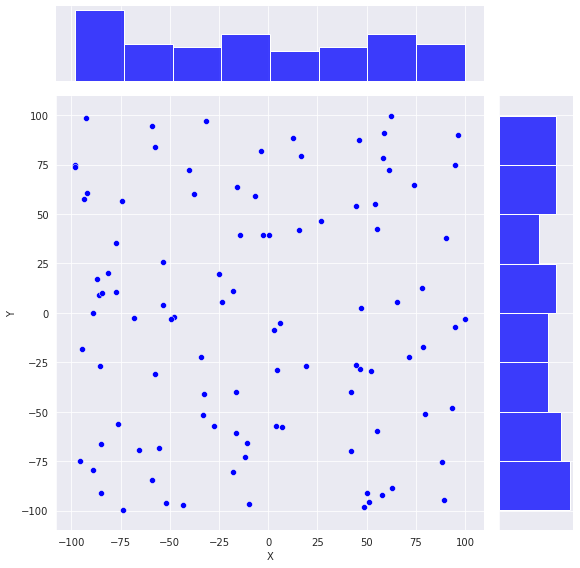

In [22]:
sns.jointplot(data=df_a, x='X', y='Y', kind='scatter', height=8, color='blue')

**b)**

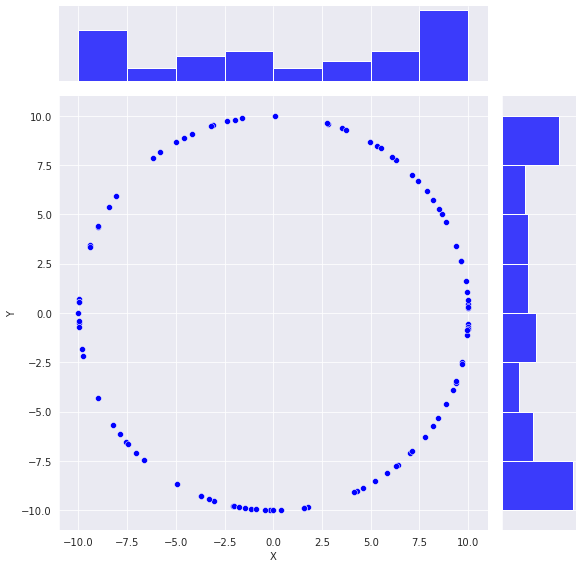

In [23]:
sns.jointplot(data=df_b, x='X', y='Y', kind='scatter', height=8, color='blue')

**c)**

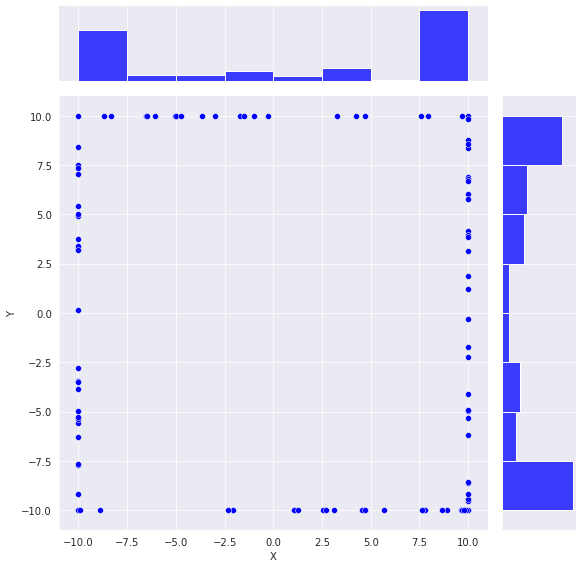

In [24]:
sns.jointplot(data=df_c, x='X', y='Y', kind='scatter', height=8, color='blue')

**d)**

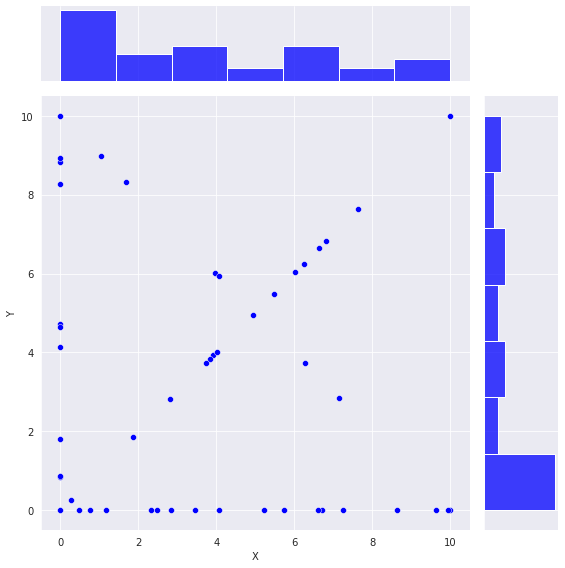

In [25]:
sns.jointplot(data=df_d, x='X', y='Y', kind='scatter', height=8, color='blue')

---
## Zmodyfikuj program z punktu 1 tak, aby możliwe było zadawanie określonych parametrów dla schematów losowania punktów podanych powyżej:
    a) liczba punktów, przedziały dla współrzędnych,
    b) liczba punktów, środek i promień okręgu,
    c) liczba punktów, wierzchołki prostokąta,
    d) wierzchołki kwadratu, liczba punktów na osiach, liczba punktów na przekątnych.

**a)**

In [26]:
def random_points_on_the_range(num_of_points, ranges):
    new_data_a = np.random.uniform(ranges[0], ranges[1], size = [num_of_points, 2])
    return new_data_a

In [27]:
new_data_a = random_points_on_the_range(40, [-200, 200])

In [28]:
new_data_a[:10]

array([[  81.91040979, -113.19070431],
       [ 171.01410728,  -47.67503602],
       [  63.16725889,   15.46979867],
       [ -21.85868664,  -51.73837773],
       [-178.66983415, -123.04639937],
       [-163.8801624 , -117.75757944],
       [ -92.58336365,  169.25672001],
       [  85.77974806,  183.53797897],
       [ 177.23849504,   72.63091686],
       [ -28.02024605, -173.05122136]])

In [29]:
new_df_a = pd.DataFrame(data=new_data_a, columns=['X', 'Y'])

In [30]:
new_df_a.head()

,X,Y
0,81.910410,-113.190704
1,171.014107,-47.675036
2,63.167259,15.469799
3,-21.858687,-51.738378
4,-178.669834,-123.046399


In [31]:
new_df_a.describe()

,X,Y
count,40.000000,40.000000
mean,14.444327,6.872371
std,123.394557,100.237605
min,-199.869110,-173.051221
25%,-98.693275,-60.916263
50%,62.252709,10.616960
75%,107.486061,73.074168
max,182.974437,187.654380


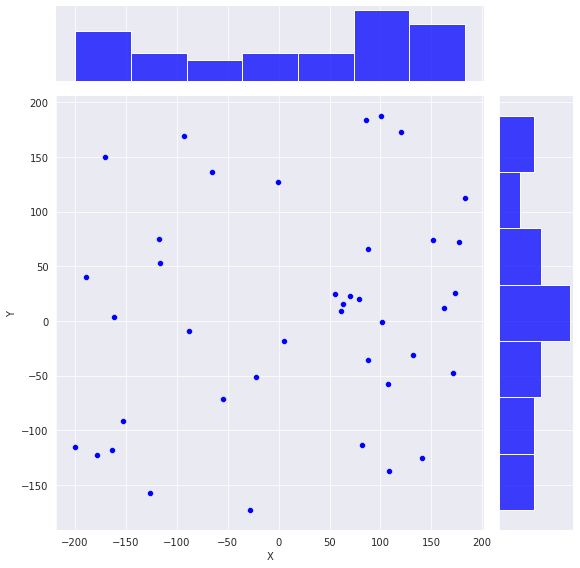

In [32]:
sns.jointplot(data=new_df_a, x='X', y='Y', kind='scatter', height=8, color='blue')

**b)**

In [33]:
def random_points_on_the_circle(num_of_points, center, R):
    new_data_b = [None for _ in range(num_of_points)]
    for i in range(num_of_points):
        alpha = 2 * np.pi * np.random.random_sample()
        new_data_b[i] = (R * np.cos(alpha) + center[0], R * np.sin(alpha) + center[1])
    return new_data_b

In [34]:
new_data_b = random_points_on_the_circle(30, [50, 50], 120)

In [35]:
new_data_b[:10]

[(94.52075551160618, 161.43564209298472),
 (157.8245966177877, 102.66741273511889),
 (168.4462095789831, 30.75174199124456),
 (-67.18442869105618, 24.157986294586667),
 (-21.10552045725312, 146.6643934471383),
 (-48.20231421560183, 118.96597336875777),
 (144.94020154015135, 123.39181242833183),
 (83.71688400872978, -65.16584447110117),
 (40.479602196054756, 169.62174562200067),
 (146.86848810330017, 120.82722649222397)]

In [36]:
new_df_b = pd.DataFrame(data=new_data_b, columns=['X', 'Y'])

In [37]:
new_df_b.head()

,X,Y
0,94.520756,161.435642
1,157.824597,102.667413
2,168.446210,30.751742
3,-67.184429,24.157986
4,-21.105520,146.664393


In [38]:
new_df_b.describe()

,X,Y
count,30.000000,30.000000
mean,41.524431,65.721263
std,81.920164,88.632078
min,-69.835341,-69.115245
25%,-27.298196,-25.003342
50%,45.391218,94.298900
75%,105.883776,149.314593
max,169.987076,169.999618


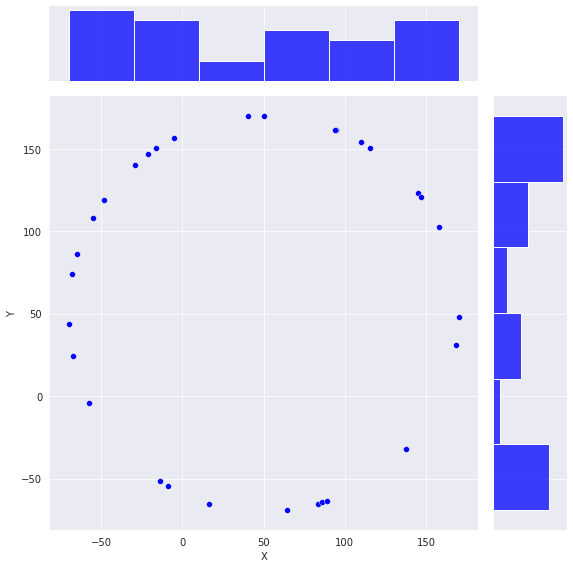

In [39]:
sns.jointplot(data=new_df_b, x='X', y='Y', kind='scatter', height=8, color='blue')

**c)**

In [40]:
def random_points_on_the_rectangle(num_of_points, vertices):
    min_y = min_x = np.inf
    max_y = max_x = -np.inf
    for v in vertices:
        min_x = min(min_x, v[0])
        min_y = min(min_y, v[1])
        max_x = max(max_x, v[0])
        max_y = max(max_y, v[1])

    x_side = abs(max_x - min_x)
    y_side = abs(max_y - min_y)
    total_range = 2 * x_side + 2 * y_side
    ranges = [(0, y_side), (y_side, 2 * y_side),
              (2 * y_side, 2 * y_side + x_side), (2 * y_side + x_side, total_range)]
    
# Każdy bok ma swój przedział, dzięki temu otrzymujemy jeden duży przedział w którym
# losowany jest 1 punkt i jest przydzielany do odpowiedniego boku. Taki podział
# generowania punktów na bokach prostokąta zapewnia najlepszy rozkład
# prawdopodobieństwa dla różnych długości boków.
    
    new_data_c = []
    for v in vertices:
        new_data_c.append(v)
        
    for _ in range(num_of_points - 4):
        point = np.random.uniform(0, total_range)

        # left side
        if ranges[0][0] <= point <= ranges[0][1]:
            result = (min_x, min_y + point)

        # right side
        elif ranges[1][0] < point <= ranges[1][1]:
            result = (max_x, min_y + (point - ranges[1][0]))

        # bottom side
        elif ranges[2][0] < point <= ranges[2][1]:
            result = (min_x + (point - ranges[2][0]), min_y)

        # upper side
        else:
            result = (min_x + (point - ranges[3][0]), max_y)
        new_data_c.append(result)
    return new_data_c

In [41]:
new_data_c = random_points_on_the_rectangle(40, [(-30, -10), (-30, 40), (50, 40), (50, -10)])

In [42]:
new_data_c[:10]

[(-30, -10),
 (-30, 40),
 (50, 40),
 (50, -10),
 (44.84280755949965, 40),
 (-30, -1.8285863463984882),
 (37.07590625367746, -10),
 (-4.55152342581043, -10),
 (6.748664296025993, 40),
 (50, 34.1594447333501)]

In [43]:
new_df_c = pd.DataFrame(data=new_data_c, columns=['X', 'Y'])

In [44]:
new_df_c.head()

,X,Y
0,-30.000000,-10.0
1,-30.000000,40.0
2,50.000000,40.0
3,50.000000,-10.0
4,44.842808,40.0


In [45]:
new_df_c.describe()

,X,Y
count,40.000000,40.000000
mean,5.467372,10.011343
std,31.066856,21.141267
min,-30.000000,-10.000000
25%,-30.000000,-10.000000
50%,-2.548770,1.755339
75%,39.261309,29.072623
max,50.000000,40.000000


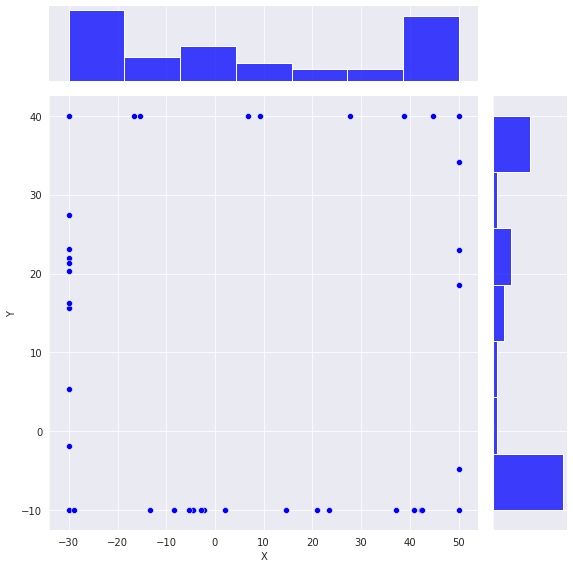

In [46]:
sns.jointplot(data=new_df_c, x='X', y='Y', kind='scatter', height=8, color='blue')

**d)**

In [47]:
def random_points_on_square(vertices, side_num_of_points, diag_num_of_points):
    min_y = min_x = np.inf 
    max_y = max_x = -np.inf
    for v in vertices:
        min_x = min(min_x, v[0])
        min_y = min(min_y, v[1])
        max_x = max(max_x, v[0])
        max_y = max(max_y, v[1])
    
    side = abs(max_x-min_x)
    total_range = 2 * side
    
# Każdy bok ma swój przedział, dzięki temu otrzymujemy jeden duży przedział w którym
# losowany jest 1 punkt i jest przydzielany do odpowiedniego boku. Taki podział
# generowania punktów na bokach prostokąta zapewnia najlepszy rozkład
# prawdopodobieństwa dla różnych długości boków.

    new_data_d = []
    for v in vertices:
        new_data_d.append(v)
        
    for _ in range(side_num_of_points):
        point = np.random.uniform(0, total_range)
        if 0 <= point <= total_range/2:
            side_result = (min_x, min_y+point)
        else:
            side_result = (min_x+(point-total_range/2), min_y)
        new_data_d.append(side_result)

    for _ in range(diag_num_of_points):
        point = np.random.uniform(0, total_range)
        if 0 <= point <= total_range/2:
            diag_result = (min_x+point, min_y+point)
        else:
            diag_result = (min_x+(point-total_range/2), max_y-(point-total_range/2))
        new_data_d.append(diag_result)
    return new_data_d

In [48]:
new_data_d = random_points_on_square([(-30, -10), (-30, 30), (10, 30), (10, -10)], 40, 20)

In [49]:
new_data_d[:10]

[(-30, -10),
 (-30, 30),
 (10, 30),
 (10, -10),
 (-14.843616473818145, -10),
 (-6.562233581194718, -10),
 (-30, -9.104018084329697),
 (9.793848711085161, -10),
 (0.8431914509503855, -10),
 (-25.10648463530881, -10)]

In [50]:
new_df_d = pd.DataFrame(data=new_data_d, columns=['X', 'Y'])

In [51]:
new_df_d.head()

,X,Y
0,-30.000000,-10.0
1,-30.000000,30.0
2,10.000000,30.0
3,10.000000,-10.0
4,-14.843616,-10.0


In [52]:
new_df_d.describe()

,X,Y
count,64.000000,64.000000
mean,-15.705667,4.452155
std,13.796371,13.923635
min,-30.000000,-10.000000
25%,-30.000000,-10.000000
50%,-15.060587,2.975902
75%,-6.768091,13.688906
max,10.000000,30.000000


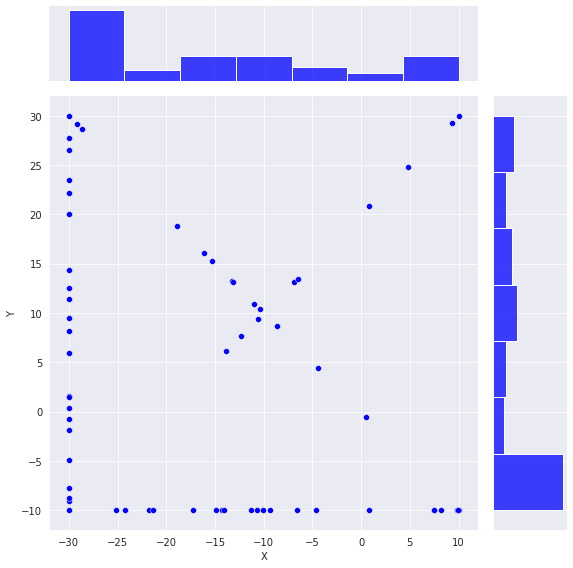

In [53]:
sns.jointplot(data=new_df_d, x='X', y='Y', kind='scatter', height=8, color='blue')

---
## Zaimplementuj algorytmy Grahama oraz Jarvisa wyznaczające otoczkę wypukłą dla zadanego zbioru punktów. Przetestuj program na zbiorach z punktu 1 oraz zmodyfikowanych zbiorach z punktu 3. Program powinien pozwolić na zapisanie w pliku wyniku działania, czyli ciągu wierzchołków otoczki. Dodaj możliwość sprawdzenia czasu działania algorytmu.

In [54]:
def scatter_plot(df, hull, algorithm, final_plot = False):
    if algorithm.__name__ == "graham_algorithm":
        points = df
        x, y = zip(*points)
    else:
        x, y = df['X'], df['Y']
    plt.scatter(x, y, c='red')
    if len(hull) != 0:
        for i in range(len(hull)):
            if i == len(hull) - 1:
                if final_plot:
                    i = -1
                else:
                    break
            x1, y1 = hull[i]
            x2, y2 = hull[i + 1]
            plt.plot((x1, x2), (y1, y2), linestyle='-', color='blue')
            plt.scatter((x1, x2), (y1, y2), c='blue')
    plt.show()

### Algorytm Grahama

In [55]:
def distance(point_1, point_2):
    return np.sqrt((point_1[0] - point_2[0]) ** 2 + (point_1[1] - point_2[1]) ** 2)


def compare(a, b, c, epsilon):
    orientation = det(c, a, b)
    if -epsilon <= orientation <= epsilon:
        return distance(a, c) < distance(b, c)
    else:
        return orientation > epsilon


def find_left_most_point(df_points):
    left_most_index = 0
    left_most_point = (np.inf, np.inf)
    for index, row in df_points.iterrows():
        point = (row['X'], row['Y'])
        if point[0] < left_most_point[0]:
            left_most_point = point
            left_most_index = index
        elif point[0] == left_most_point[0] and point[1] < left_most_point[1]:
            left_most_point = point
            left_most_index = index
    return left_most_point, left_most_index


def det(a, b, c):
    a_x, a_y = a
    b_x, b_y = b
    c_x, c_y = c
    first = (a_x - c_x) * (b_y - c_y)
    second = (a_y - c_y) * (b_x - c_x)
    return first - second

def quicksort(points, l, r, comparator = lambda x, y: x < y):
    if l == r:
        return
    mid = (l + r) // 2
    pivot = points[mid]
    idx = l
    points[r - 1], points[mid] = points[mid], points[r - 1]
    for i in range(l, r - 1):
        if comparator(points[i], pivot):
            points[i], points[idx] = points[idx], points[i]
            idx += 1
    points[r - 1], points[idx] = points[idx], points[r - 1]
    quicksort(points, l, idx, comparator)
    quicksort(points, idx + 1, r, comparator)

In [56]:
def graham_algorithm(df, epsilon=10 ** (-12), write_to_file=False,filename='graham_result', visualize=True):
    lowest_point, _ = find_left_most_point(df)
    points = []
    for index, row in df.iterrows():
        points.append((df['X'][index], df['Y'][index]))
    
    comparator = partial(compare, c = lowest_point, epsilon=epsilon)
    quicksort(points, 0, len(points), comparator)
    convex_hull = [points[0], points[1]]
    
    for point in points[3:]:
        orientation = det(convex_hull[-2], convex_hull[-1], point)
        if len(convex_hull) == 1:
            convex_hull.append(point)
        else:
            while orientation < -epsilon:
                convex_hull.pop()
                orientation = det(convex_hull[-2], convex_hull[-1], point)
            if -epsilon <= orientation <= epsilon:
                convex_hull.pop()
            convex_hull.append(point)
        if visualize:
            scatter_plot(points, convex_hull, graham_algorithm)
    if visualize:
        scatter_plot(points, convex_hull, graham_algorithm, final_plot=True)
    if write_to_file:
        with open(f'{filename}.txt', 'w') as file:
            for item in convex_hull:
                file.write(f"{item}\n")
    return convex_hull 

### Algorytm Jarvisa

In [57]:
def find_left_most_point(df_points):
    left_most_index = 0
    left_most_point = (np.inf, np.inf)
    for index, row in df_points.iterrows():
        point = (row['X'], row['Y'])
        if point[0] < left_most_point[0]:
            left_most_point = point
            left_most_index = index
        elif point[0] == left_most_point[0] and point[1] < left_most_point[1]:
            left_most_point = point
            left_most_index = index
    return left_most_point, left_most_index

def distance(point_1, point_2):
    return (point_2[0] - point_1[0]) ** 2 + (point_2[1] - point_1[1]) ** 2

In [58]:
def jarvis_algorithm(df, epsilon=10 ** (-12), write_to_file=False, filename='jarvis_result', visualize=True):
    convex_point, convex_idx = find_left_most_point(df)
    convex_hull = [convex_point]
    p = convex_idx
    while True:
        q = (p + 1) % len(df)
        for index, row in df.iterrows():
            if index == p and index == q:
                continue
            point_1 = df['X'][p], df['Y'][p]
            point_2 = df['X'][q], df['Y'][q]
            point_3 = df['X'][index], df['Y'][index]
            orientation = det(point_1, point_2, point_3)
            if orientation > epsilon:
                q = index
            elif -epsilon <= orientation <= epsilon:
                if distance(point_1, point_2) < distance(point_1, point_3):
                    q = index
        p = q
        convex_hull.append((df['X'][p], df['Y'][p]))
        if visualize:
            scatter_plot(df, convex_hull, jarvis_algorithm)
        if p == convex_idx:
            break
    if write_to_file:
        with open(f'{filename}.txt', 'w') as file:
            for item in convex_hull:
                file.write(f"{item}\n")
    convex_hull.pop()
    return convex_hull

## Uruchom aplikację graficzną tak, aby można było zilustrować graficznie poszczególne kroki realizacji algorytmu. Jednym kolorem powinny być zaznaczone wszystkie punkty zbioru wyjściowego, drugim kolorem boki aktualnie rozpatrywane, a trzecim boki wielokąta otoczki. Po zakończeniu wyznaczania otoczki wierzchołki otoczki powinny być wyróżnione (osobnym kolorem bądź kształtem).

## Algorytm Grahama

**3. a)**

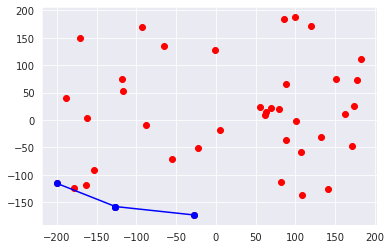

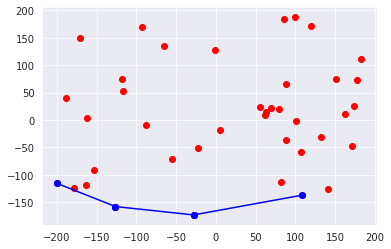

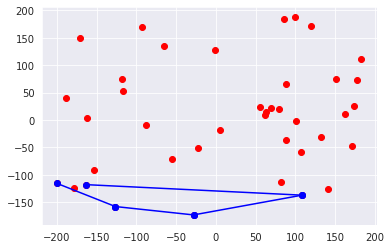

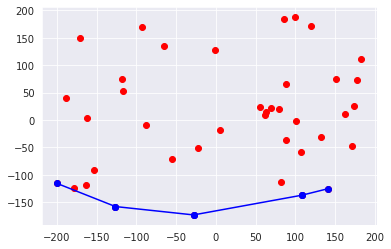

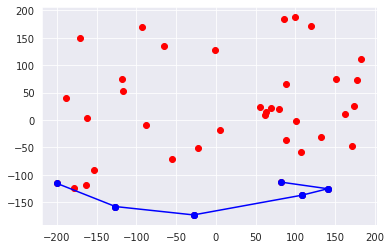

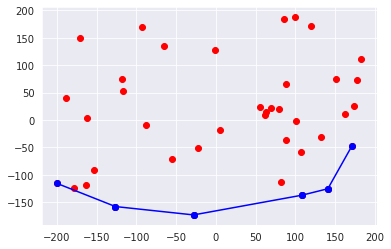

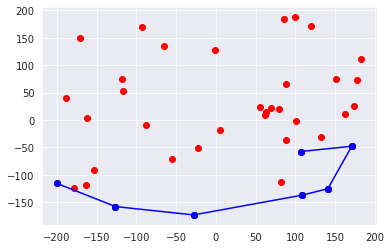

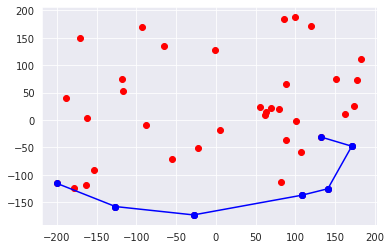

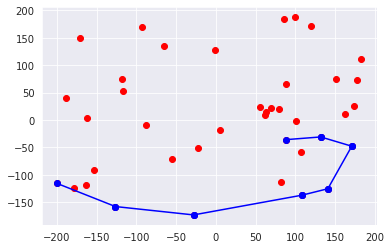

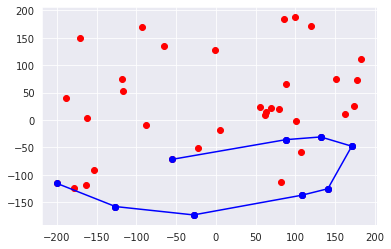

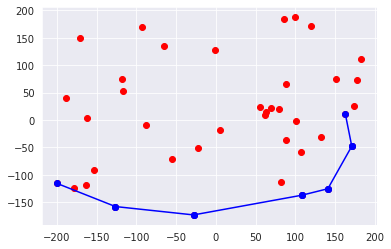

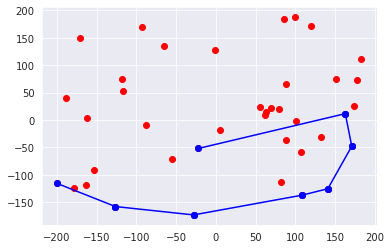

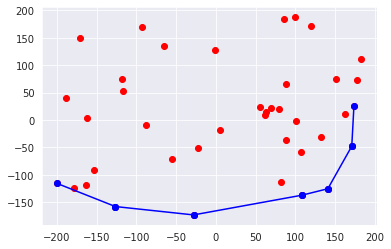

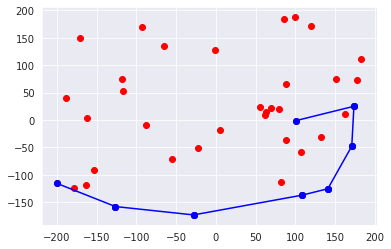

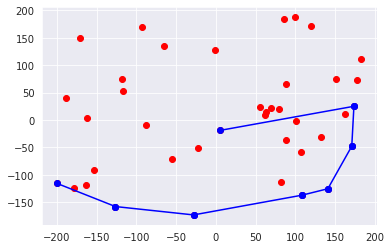

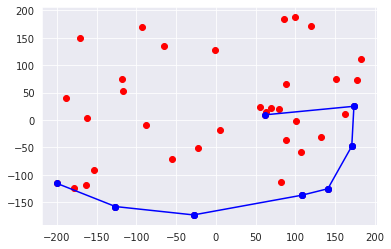

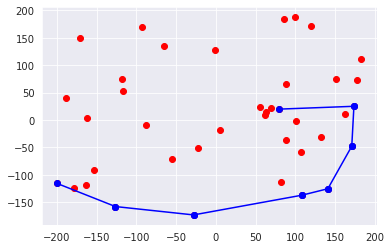

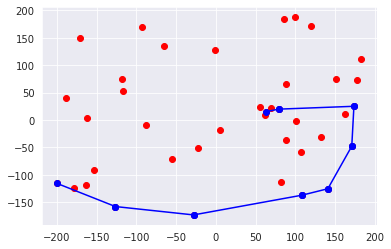

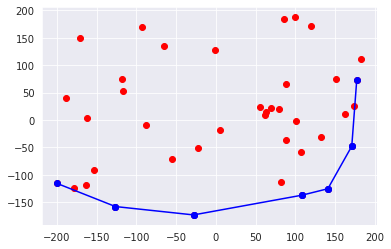

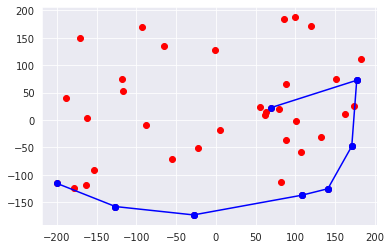

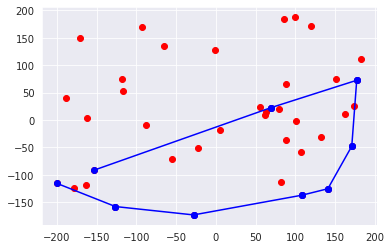

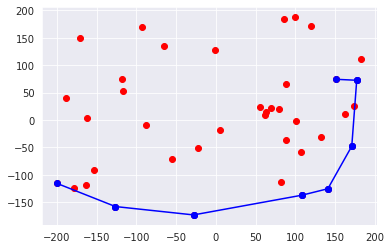

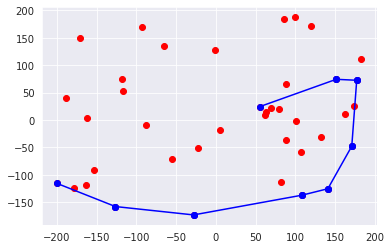

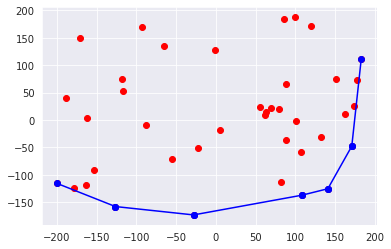

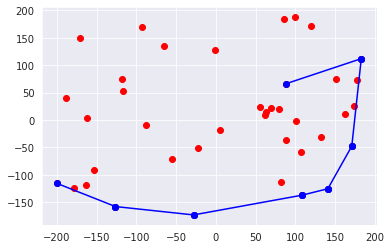

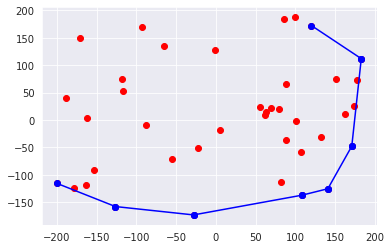

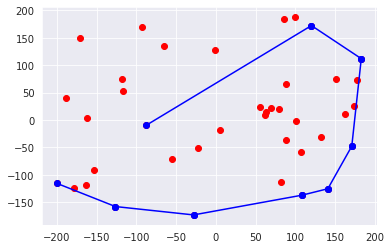

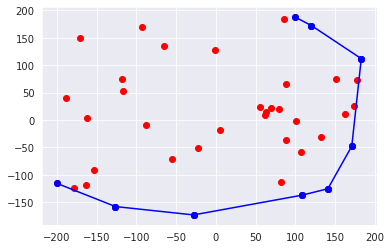

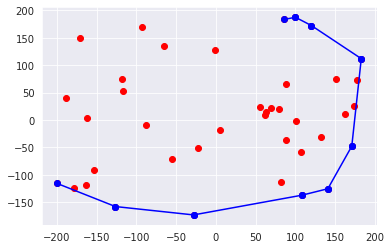

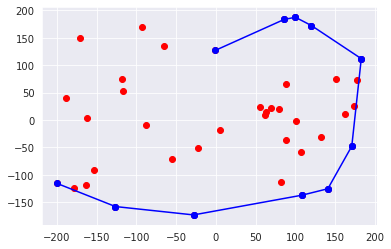

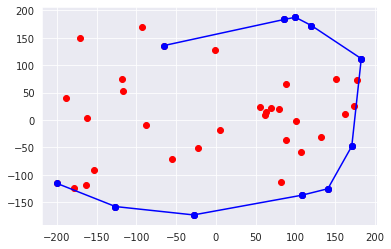

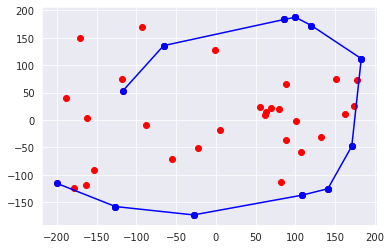

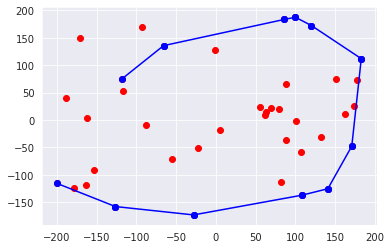

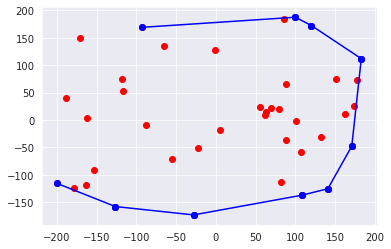

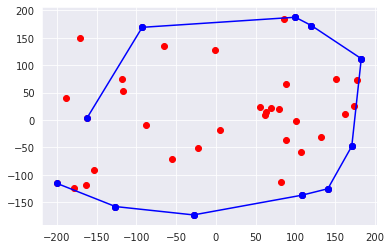

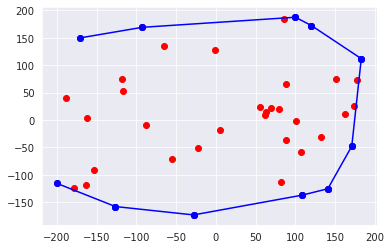

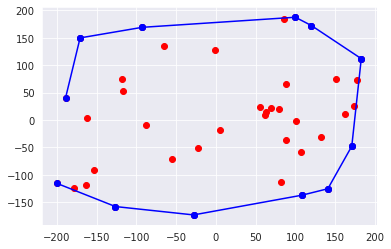

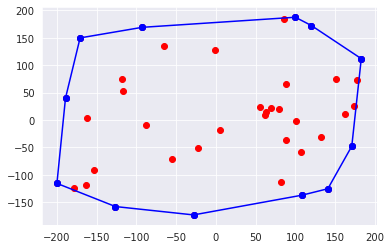

[(-199.86911038569394, -115.49717755001123), (-126.27679576312505, -157.78318659253443), (-28.020246053884364, -173.05122135597986), (108.54210935738598, -137.00471991102935), (140.9072016632445, -125.29405600423873), (171.0141072836464, -47.67503601890874), (182.97443659480683, 112.08332202521126), (120.29800784192173, 172.46398492961123), (100.06265309629526, 187.65437997962044), (-92.58336364692967, 169.25672000587008), (-170.70934025475202, 149.9592775307678), (-189.06772691558137, 40.18944194043769)]


In [59]:
print(graham_algorithm(new_df_a))

**3. b)**

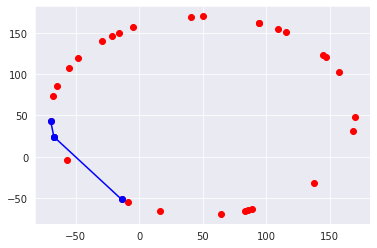

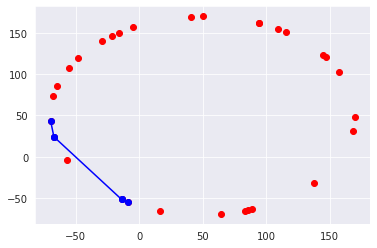

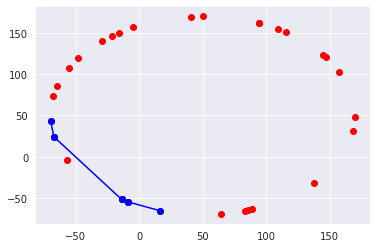

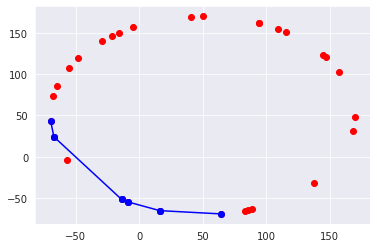

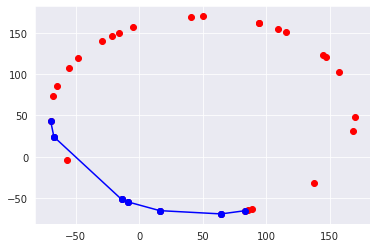

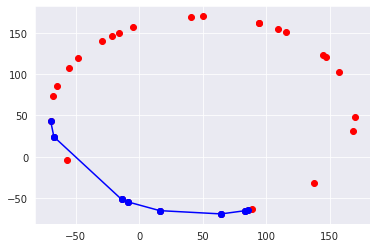

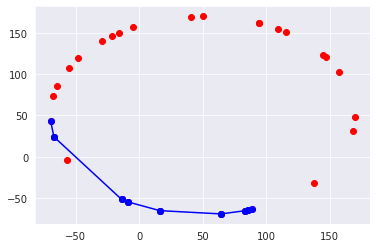

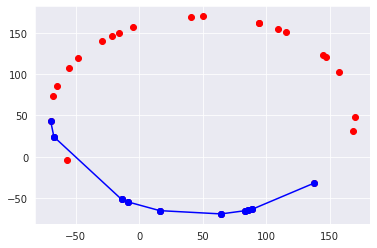

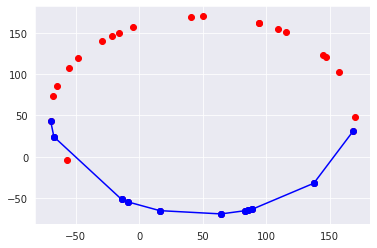

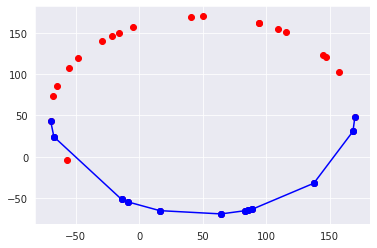

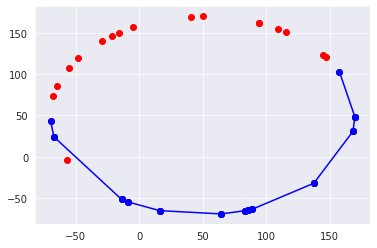

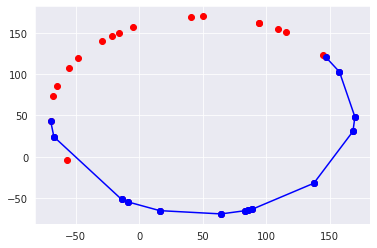

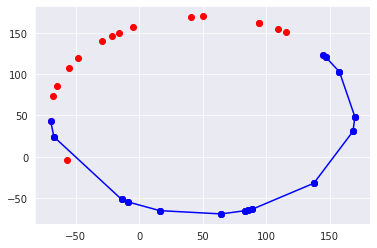

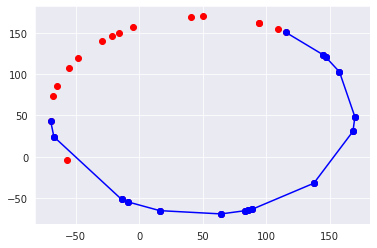

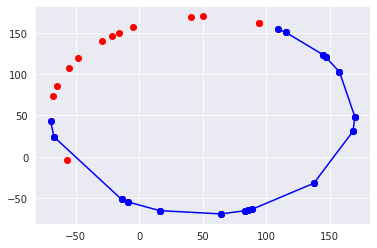

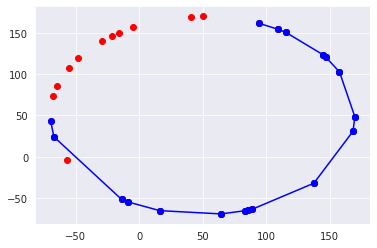

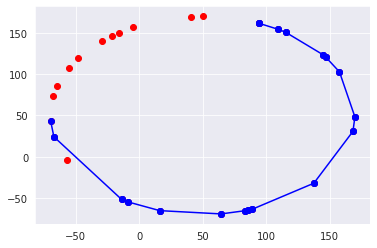

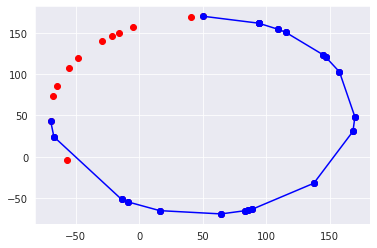

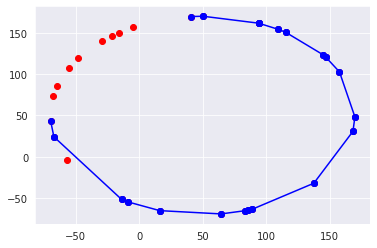

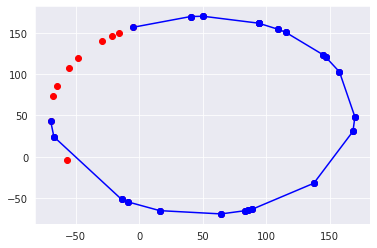

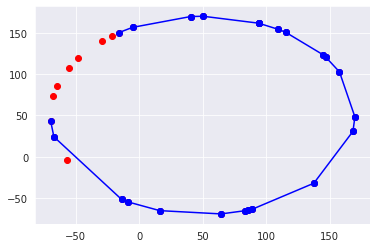

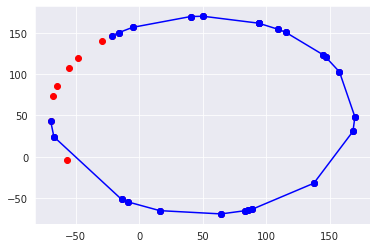

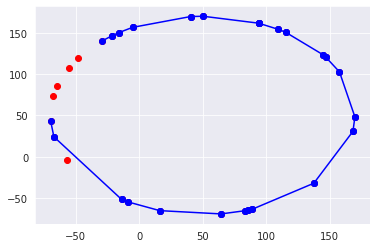

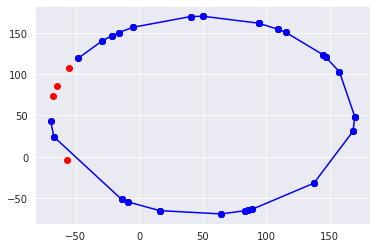

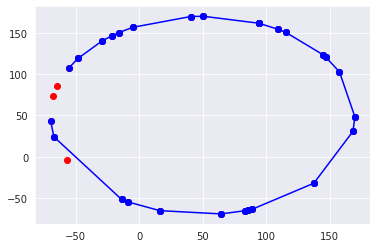

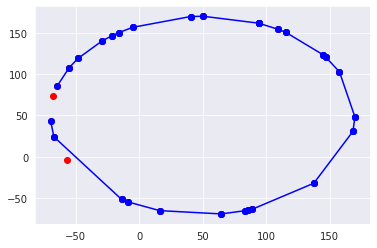

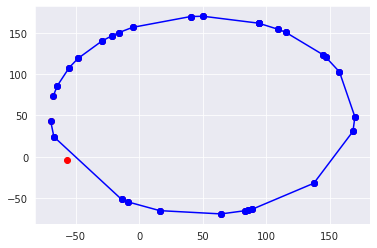

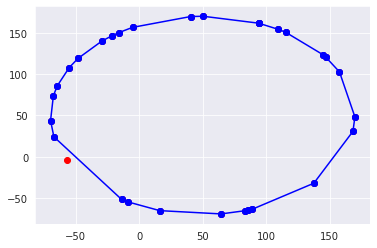

[(-69.83534143307995, 43.715817983448346), (-67.18442869105618, 24.157986294586667), (-13.798165686145254, -51.635594429723085), (-8.800496103596792, -54.60641308242482), (16.219519618321108, -65.14720641501906), (64.54505163449917, -69.11524450274932), (83.71688400872978, -65.16584447110117), (85.91968685019849, -64.49793053406546), (89.06581229210393, -63.46304380703921), (137.63183170290222, -31.979644256328783), (168.4462095789831, 30.75174199124456), (169.98707598630023, 48.23886506541655), (157.8245966177877, 102.66741273511889), (146.86848810330017, 120.82722649222397), (144.94020154015135, 123.39181242833183), (115.40903573033155, 150.606451308195), (109.67144897572122, 154.11204626333063), (94.52075551160618, 161.43564209298472), (94.03950976710428, 161.6267063899725), (50.302834653259204, 169.99961787927822), (40.479602196054756, 169.62174562200067), (-5.238760577675322, 156.53018037083325), (-16.033039192235066, 150.19799266969747), (-21.10552045725312, 146.6643934471383), (

In [60]:
print(graham_algorithm(new_df_b))

**3. c)**

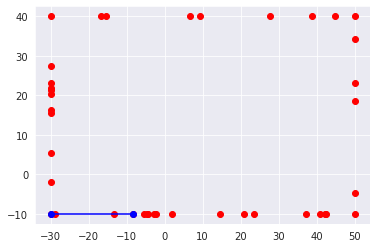

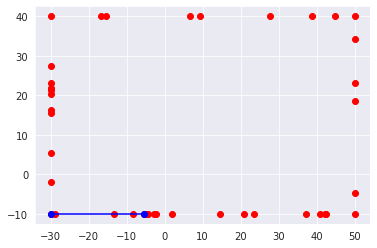

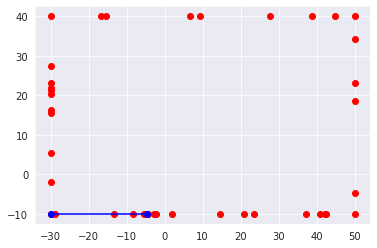

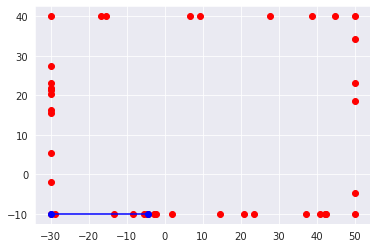

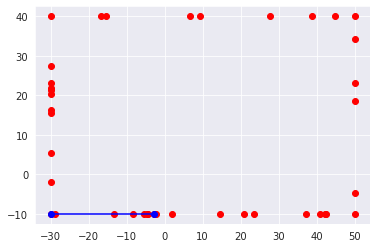

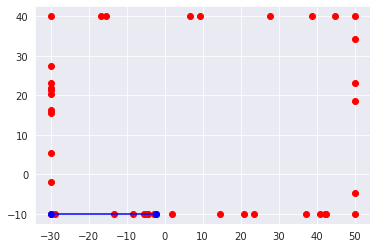

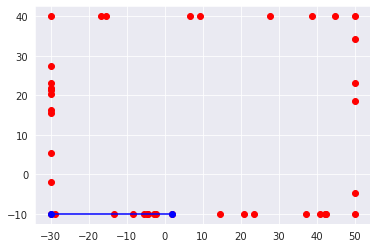

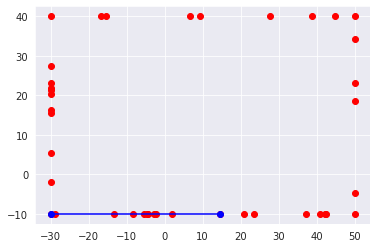

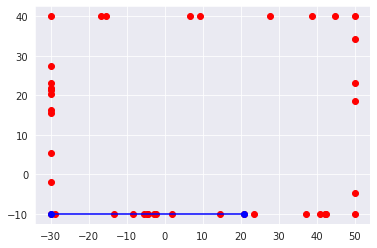

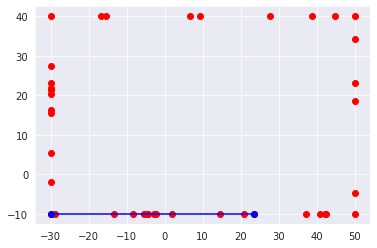

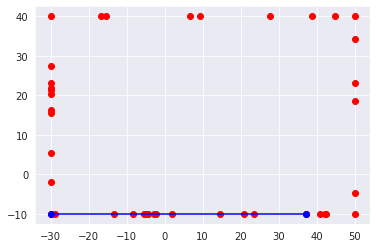

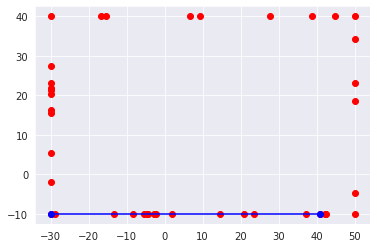

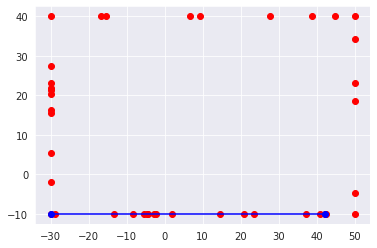

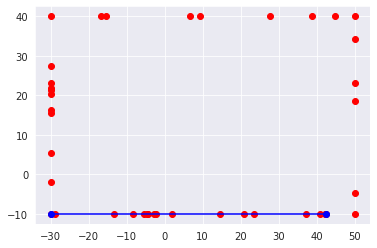

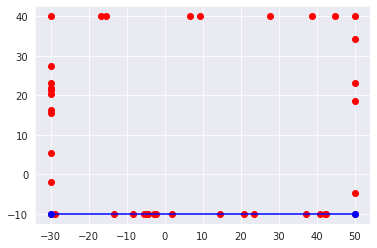

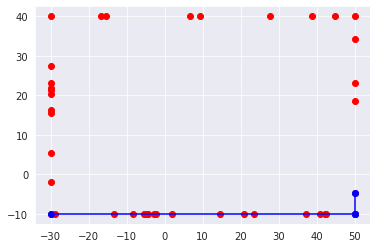

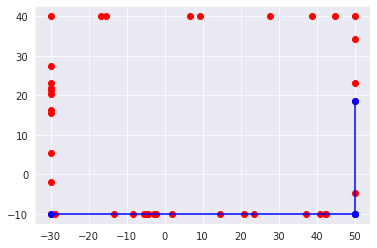

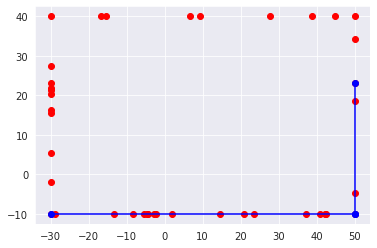

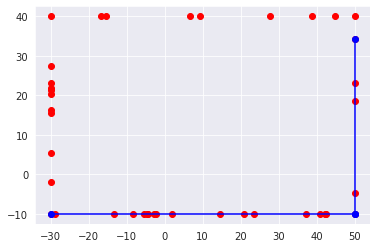

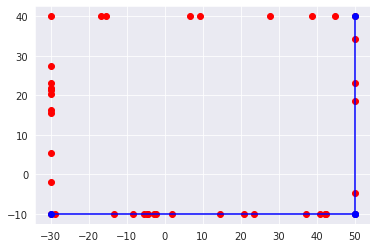

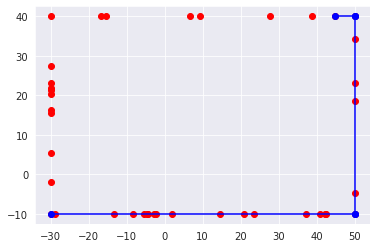

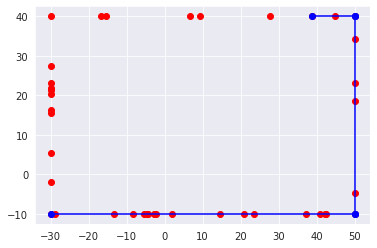

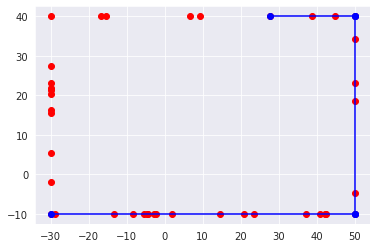

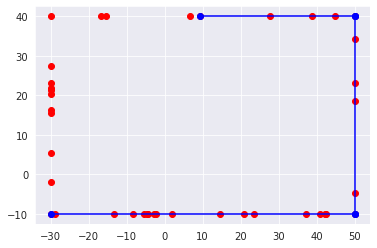

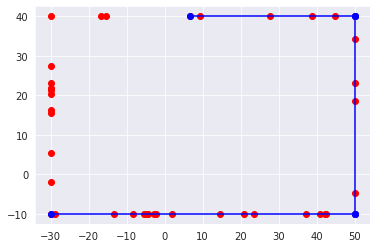

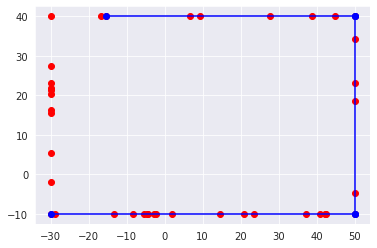

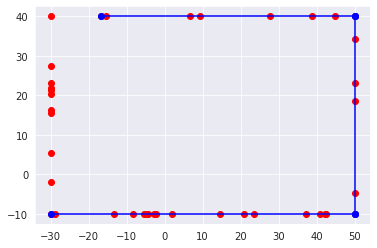

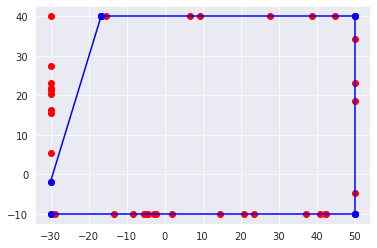

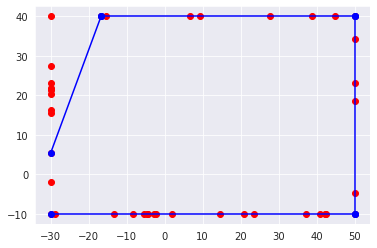

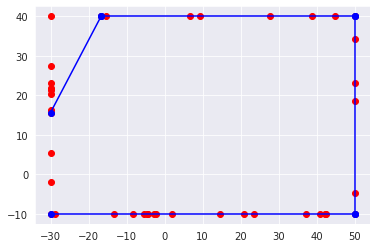

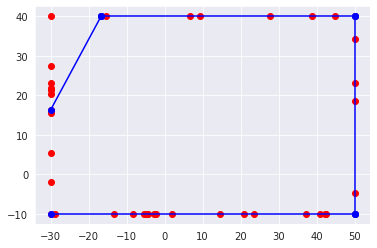

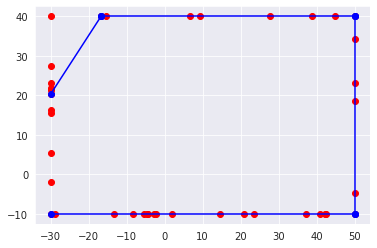

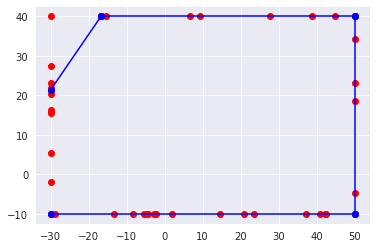

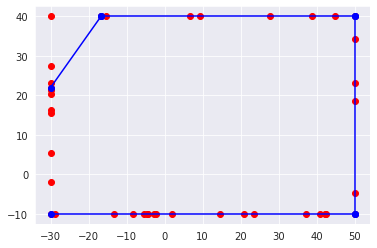

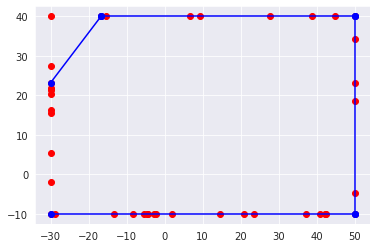

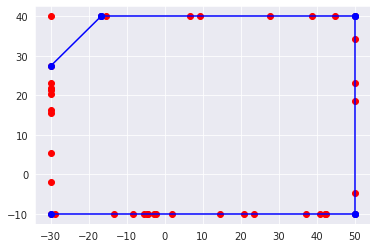

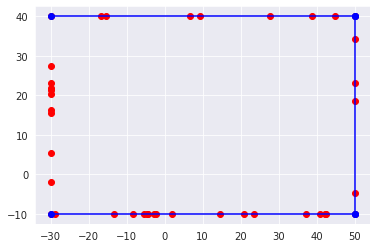

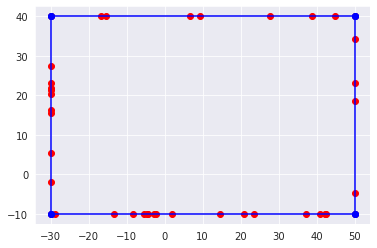

[(-30.0, -10.0), (50.0, -10.0), (50.0, 40.0), (-30.0, 40.0)]


In [61]:
print(graham_algorithm(new_df_c))

**1. d)**

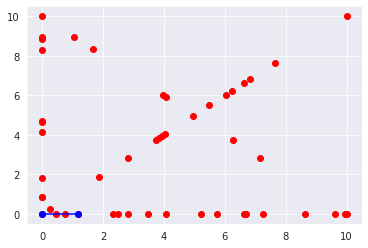

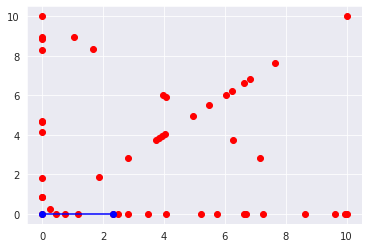

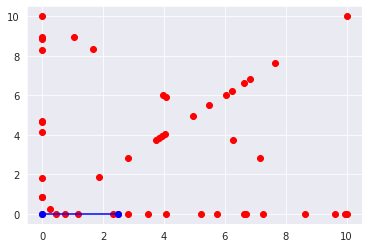

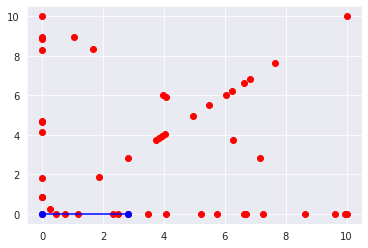

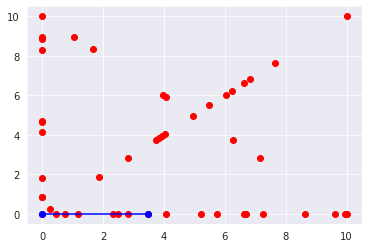

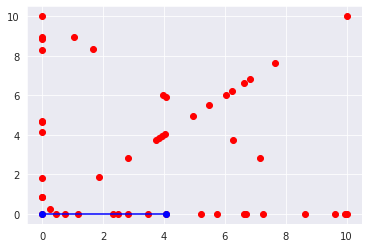

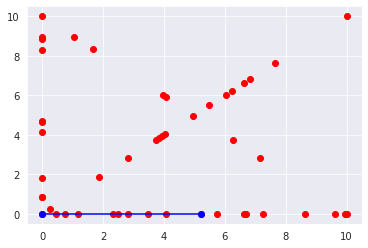

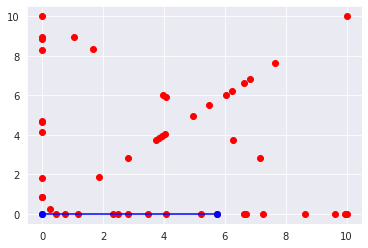

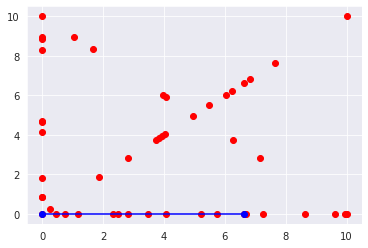

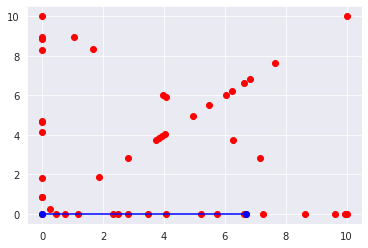

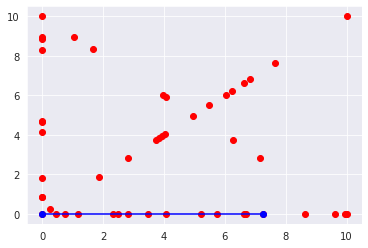

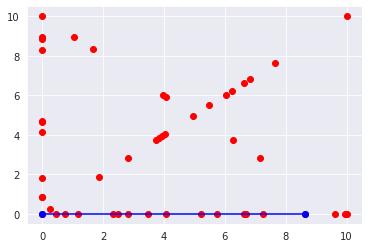

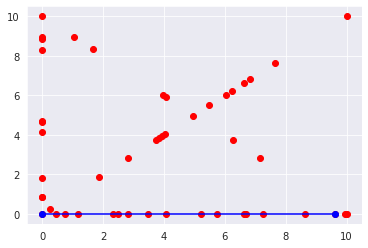

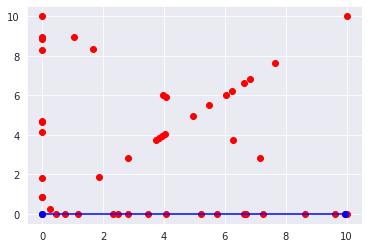

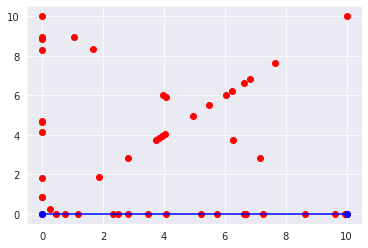

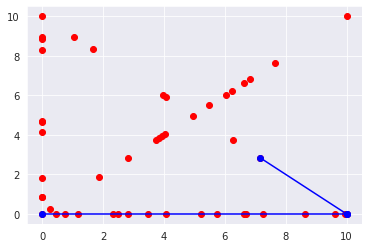

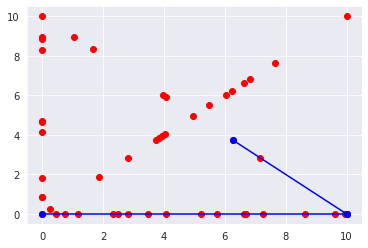

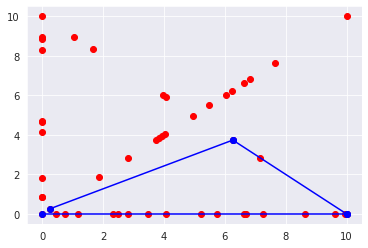

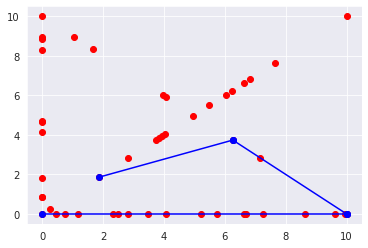

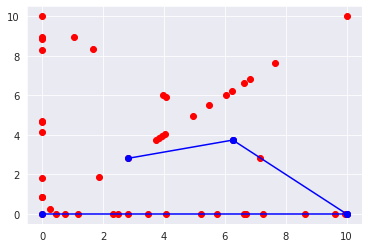

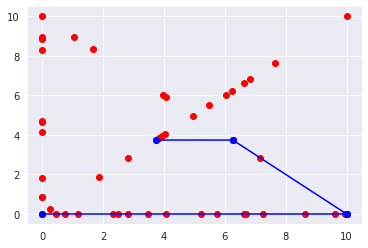

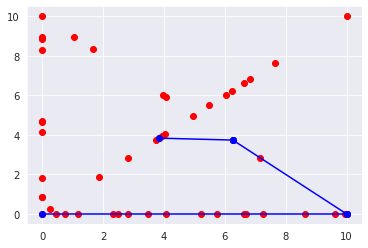

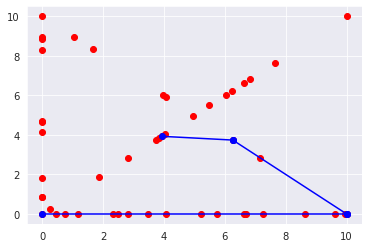

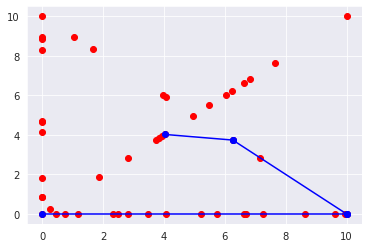

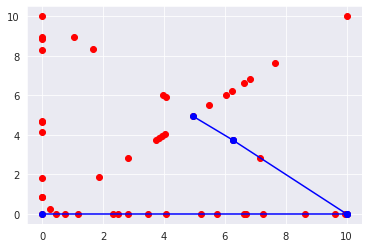

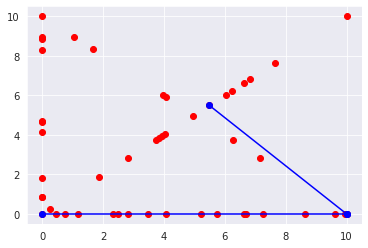

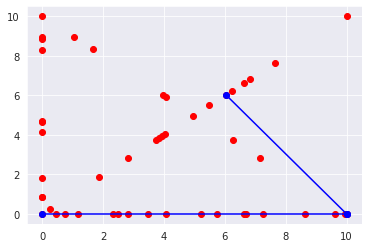

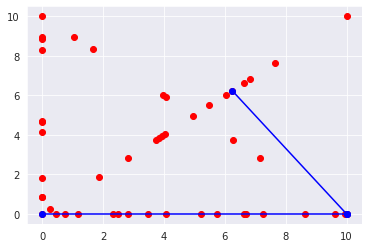

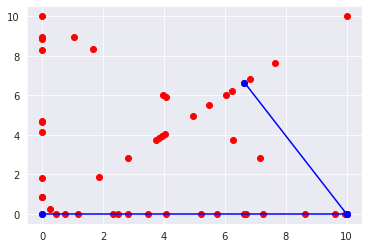

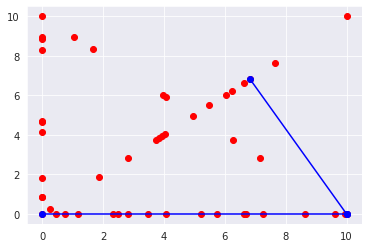

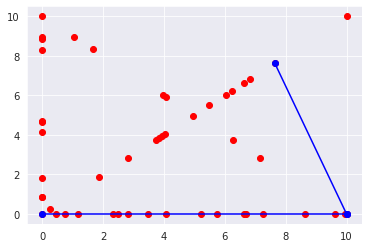

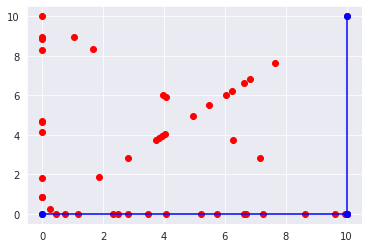

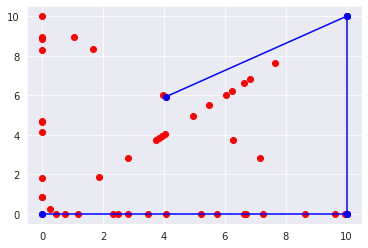

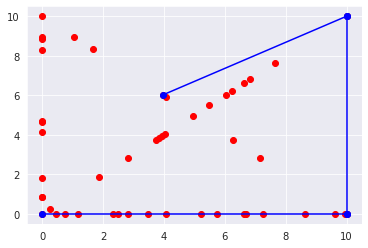

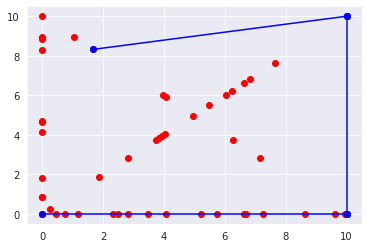

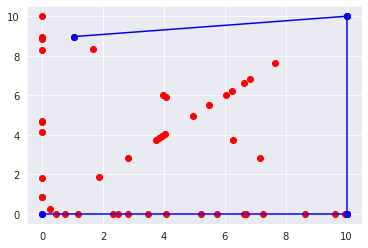

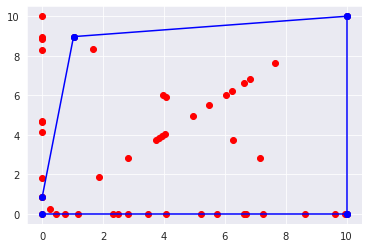

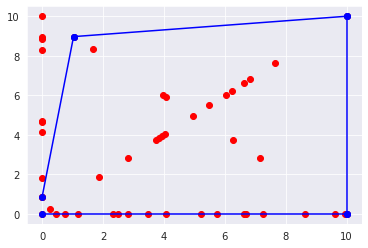

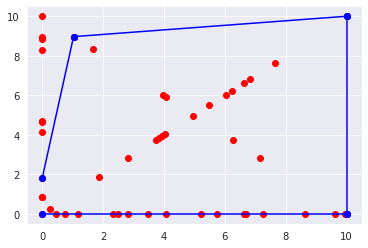

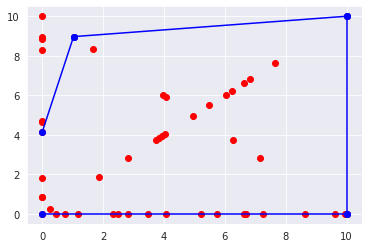

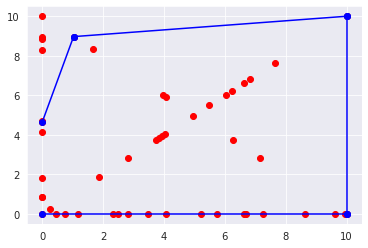

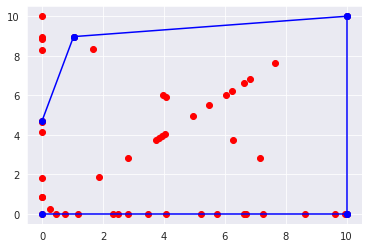

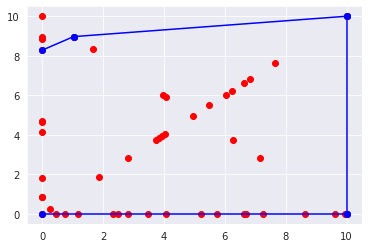

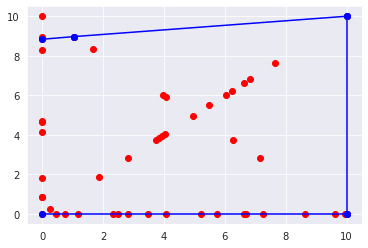

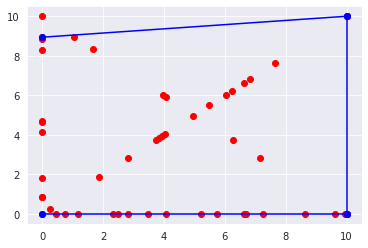

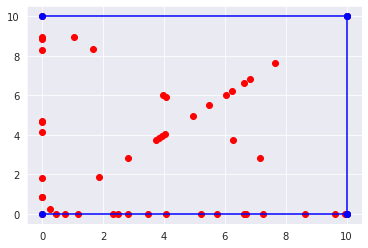

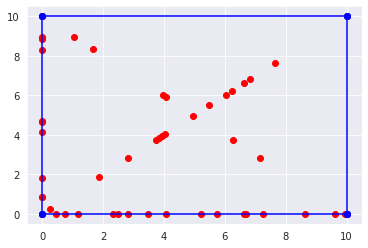

[(0.0, 0.0), (10.0, 0.0), (10.0, 10.0), (0.0, 10.0)]


In [62]:
print(graham_algorithm(df_d))

## Algorytm Jarvis

**1. a)**

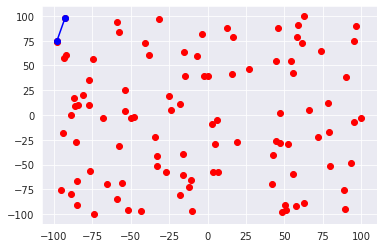

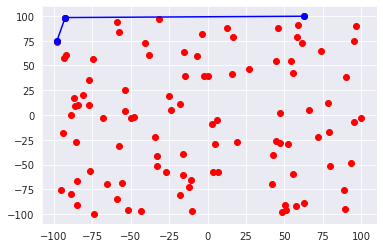

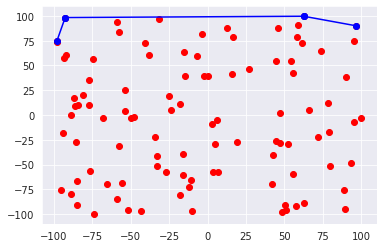

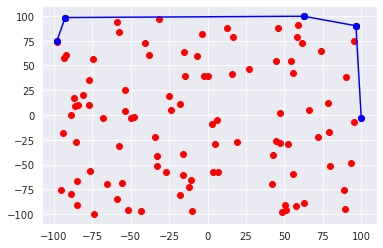

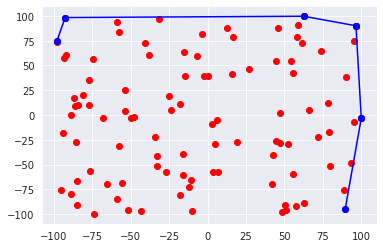

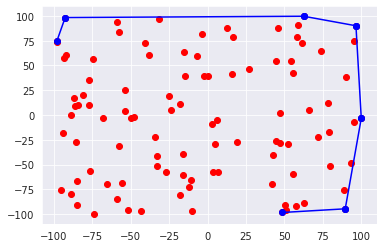

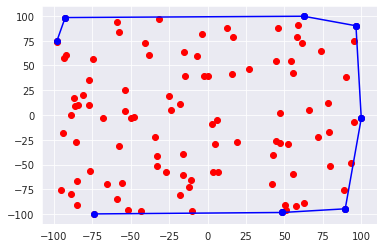

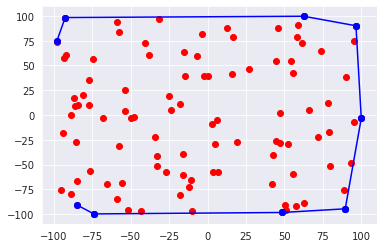

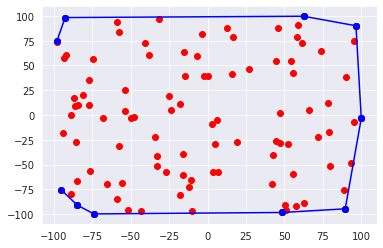

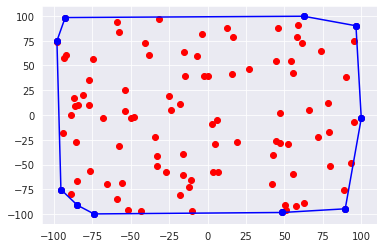

[(-98.11631990750693, 74.79709910696585), (-92.73364694841129, 98.36934504055915), (62.48996930630881, 99.67385696544122), (96.50472925106638, 90.06748358563138), (99.97882619271724, -3.255608961664919), (89.5300929140358, -94.59231647025943), (48.61656072588602, -98.29010725546381), (-73.97897721632165, -99.73713989787491), (-84.82903247309909, -90.93033868070428), (-95.51595038542544, -75.11379721231663)]


In [63]:
print(jarvis_algorithm(df_a))

**3. b)**

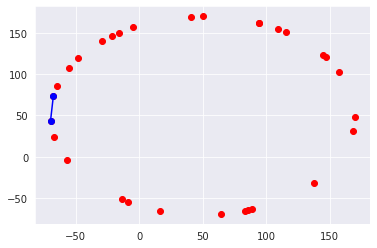

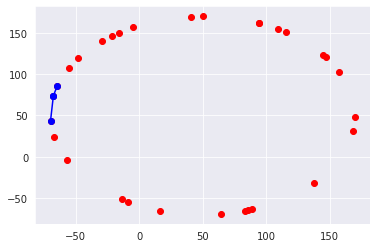

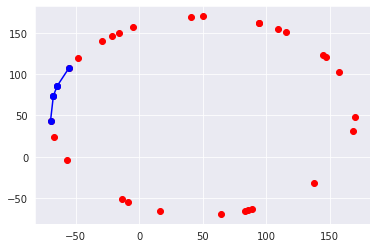

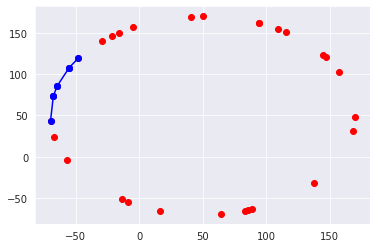

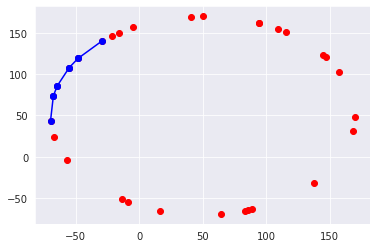

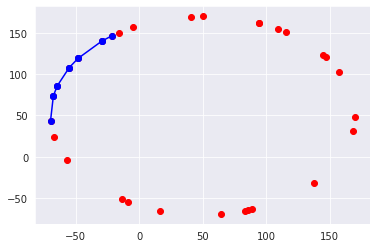

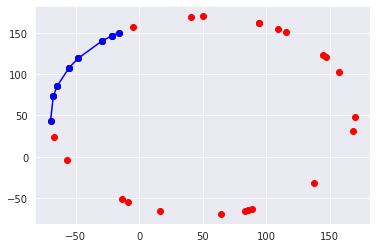

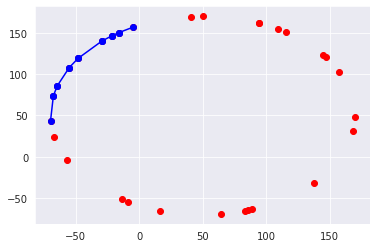

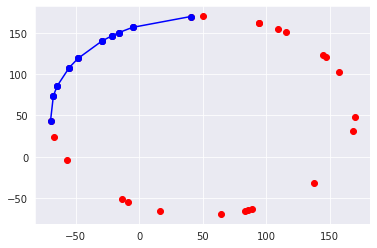

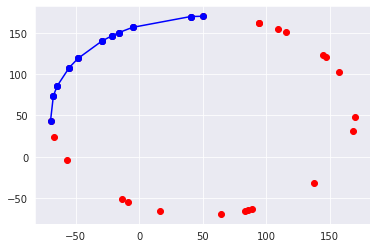

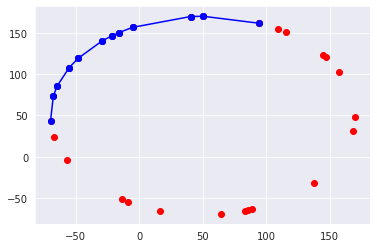

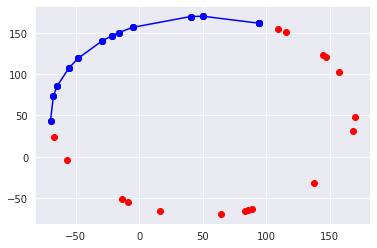

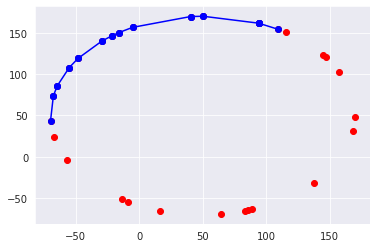

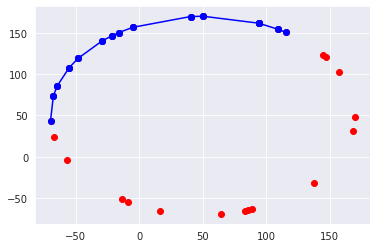

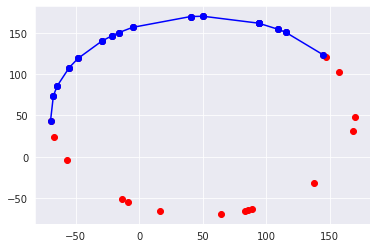

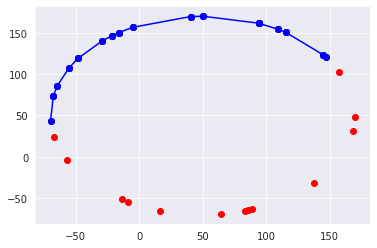

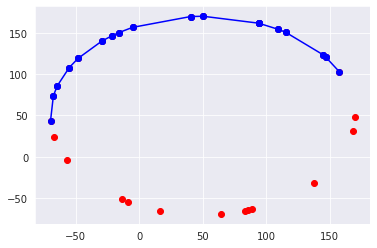

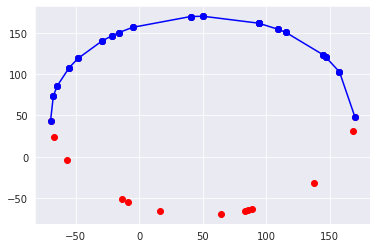

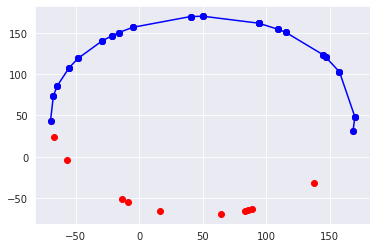

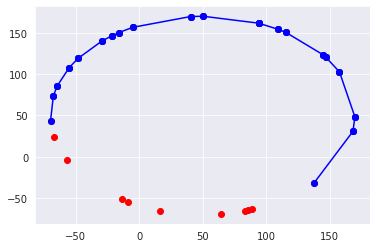

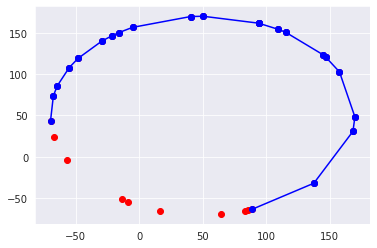

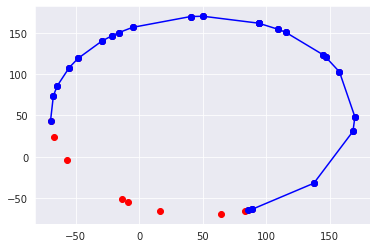

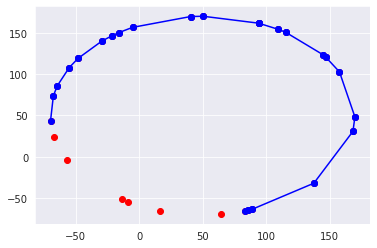

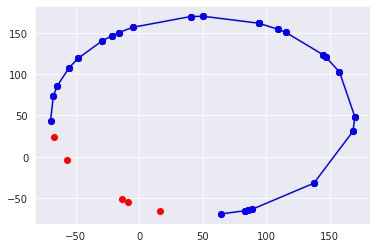

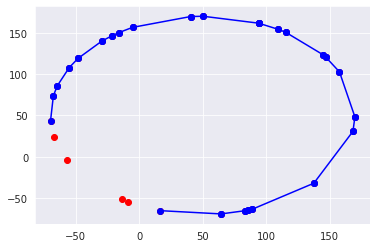

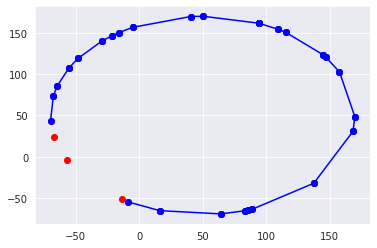

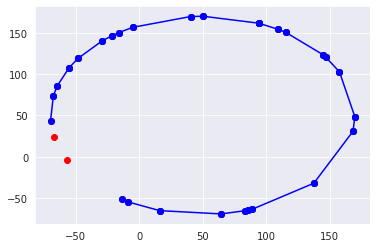

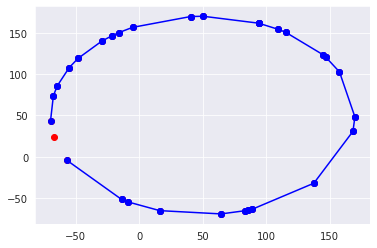

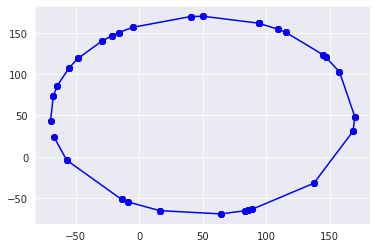

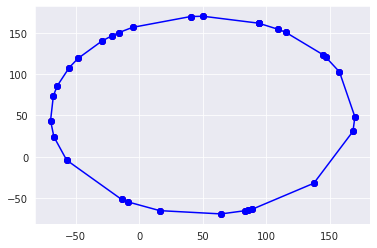

[(-69.83534143307995, 43.715817983448346), (-67.58935476333285, 73.93206314430603), (-64.49457336466236, 85.93038644440037), (-55.08531988051483, 107.94027567771727), (-48.20231421560183, 118.96597336875777), (-29.3624209115156, 140.0089225969483), (-21.10552045725312, 146.6643934471383), (-16.033039192235066, 150.19799266969747), (-5.238760577675322, 156.53018037083325), (40.479602196054756, 169.62174562200067), (50.302834653259204, 169.99961787927822), (94.03950976710428, 161.6267063899725), (94.52075551160618, 161.43564209298472), (109.67144897572122, 154.11204626333063), (115.40903573033155, 150.606451308195), (144.94020154015135, 123.39181242833183), (146.86848810330017, 120.82722649222397), (157.8245966177877, 102.66741273511889), (169.98707598630023, 48.23886506541655), (168.4462095789831, 30.75174199124456), (137.63183170290222, -31.979644256328783), (89.06581229210393, -63.46304380703921), (85.91968685019849, -64.49793053406546), (83.71688400872978, -65.16584447110117), (64.54

In [64]:
print(jarvis_algorithm(new_df_b))

**1. c)**

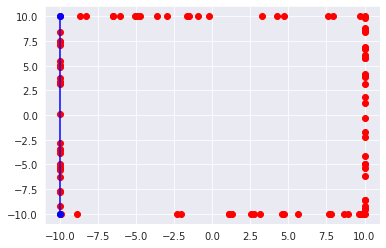

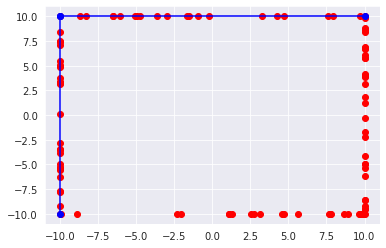

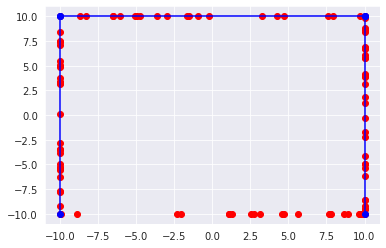

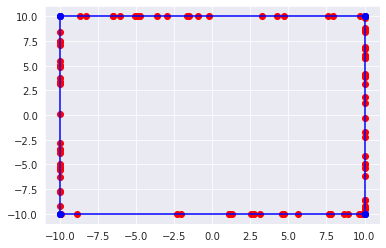

[(-10.0, -10.0), (-10.0, 10.0), (10.0, 10.0), (10.0, -10.0)]


In [65]:
print(jarvis_algorithm(df_c))

**3. d)**

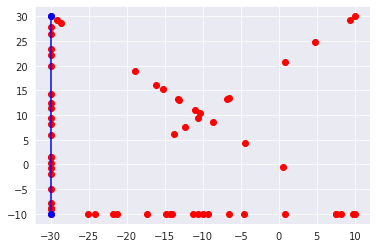

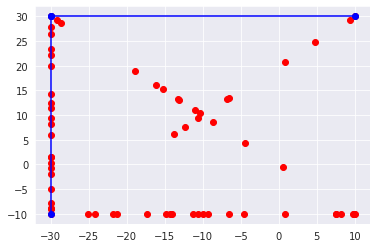

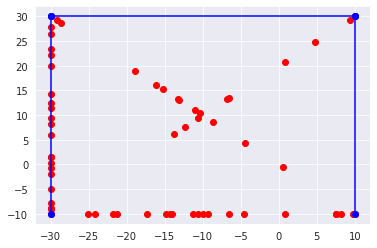

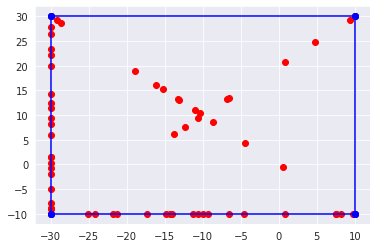

[(-30.0, -10.0), (-30.0, 30.0), (10.0, 30.0), (10.0, -10.0)]


In [66]:
print(jarvis_algorithm(new_df_d))

---
## Porównaj czasy działania obu algorytmów w zależności od liczby punktów w poszczególnych zbiorach (a, b, c, d).

In [67]:
def count_time(algorithm, df):
    start = perf_counter()
    algorithm(df, visualize=False)
    end = perf_counter()
    time = end - start
    return time

**a)**

In [68]:
def time_comparison_on_the_range():
    columns = ["Number of points", "a", "b", "Time of graham algorithm in s", "Time of jarvis algorithm in s",
               "Faster algorithm", "Time comparison in s"]
    # 'in s' oznacza czas w sekundach
    
    data = []
    for i in range(1, 11):
        current_range = [-200, 200]
        num_of_points = i * np.random.randint(i*70, i*100)
        new_data = random_points_on_the_range(num_of_points, current_range)
        new_df = pd.DataFrame(data=new_data, columns=['X', 'Y'])
        graham_time = count_time(graham_algorithm, new_df)
        jarvis_time = count_time(jarvis_algorithm, new_df)

        faster_algorithm = None
        if graham_time < jarvis_time:
            faster_algorithm = graham_algorithm.__name__
        else:
            faster_algorithm = jarvis_algorithm.__name__

        time_comparison = abs(graham_time - jarvis_time)
        data.append((num_of_points, current_range[0], current_range[1], graham_time, jarvis_time, faster_algorithm,
                     time_comparison))
    return pd.DataFrame(data=data, columns=columns)

In [69]:
time_comparison_df_a = time_comparison_on_the_range()
time_comparison_df_a

,Number of points,a,b,Time of graham algorithm in s,Time of jarvis algorithm in s,Faster algorithm,Time comparison in s
0,84,-200,200,0.012037,0.078093,graham_algorithm,0.066056
1,296,-200,200,0.035921,0.380885,graham_algorithm,0.344964
2,807,-200,200,0.098735,1.056437,graham_algorithm,0.957702
3,1348,-200,200,0.170975,1.949649,graham_algorithm,1.778674
4,1755,-200,200,0.220295,1.990708,graham_algorithm,1.770413
5,2784,-200,200,0.363854,4.436356,graham_algorithm,4.072502
6,4221,-200,200,0.543278,7.691915,graham_algorithm,7.148637
7,5424,-200,200,0.702536,6.970257,graham_algorithm,6.267721
8,7929,-200,200,1.022714,15.041478,graham_algorithm,14.018764
9,7660,-200,200,0.995591,11.025982,graham_algorithm,10.030391


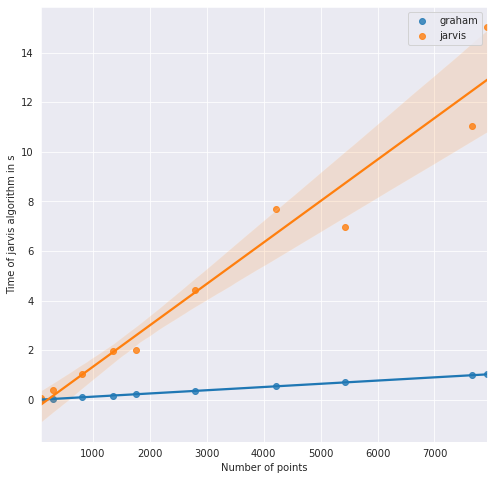

In [70]:
x = 'Number of points'
y_1 = 'Time of graham algorithm in s'
y_2 = 'Time of jarvis algorithm in s'
plt.figure(figsize=(8,8))
sns.regplot(data=time_comparison_df_a, x=x, y=y_1, label='graham')
sns.regplot(data=time_comparison_df_a, x=x, y=y_2, label='jarvis')
plt.legend(loc="best")

**b)**

In [71]:
def time_comparison_on_the_circle():
    columns = ["Number of points", "center", "R", "Time of graham algorithm in s", "Time of jarvis algorithm in s",
               "Faster algorithm", "Time comparison in s"]
    # 'in s' oznacza czas w sekundach
    
    data = []
    for i in range(1, 11):
        center = [np.random.uniform(-20, 20), np.random.uniform(-20, 20)]
        R = np.random.uniform(1, 20)
        num_of_points = i * 100
        new_data = random_points_on_the_circle(num_of_points, center, R)
        new_df = pd.DataFrame(data=new_data, columns=['X', 'Y'])
        graham_time = count_time(graham_algorithm, new_df)
        jarvis_time = count_time(jarvis_algorithm, new_df)

        faster_algorithm = None
        if graham_time < jarvis_time:
            faster_algorithm = graham_algorithm.__name__
        else:
            faster_algorithm = jarvis_algorithm.__name__

        time_comparison = abs(graham_time - jarvis_time)
        data.append((num_of_points, center, R, graham_time, jarvis_time, faster_algorithm, time_comparison))
    return pd.DataFrame(data=data, columns=columns)

In [72]:
time_comparison_df_b = time_comparison_on_the_circle()
time_comparison_df_b

,Number of points,center,R,Time of graham algorithm in s,Time of jarvis algorithm in s,Faster algorithm,Time comparison in s
0,100,"[18.723005902189676, 1.1893979992355312]",19.487709,0.013994,0.787665,graham_algorithm,0.773671
1,200,"[2.117358673687768, -17.321243282160967]",2.194839,0.024038,3.108745,graham_algorithm,3.084706
2,300,"[3.9605075828241283, 10.5005788571562]",6.731816,0.035975,6.963064,graham_algorithm,6.927089
3,400,"[-17.81301534866687, -8.095712695370572]",15.142414,0.048262,12.372224,graham_algorithm,12.323963
4,500,"[-2.2486013246451186, 2.9736945639690973]",13.727054,0.062009,19.236006,graham_algorithm,19.173997
5,600,"[-14.660458964148422, 13.62693064800191]",5.658437,0.073413,27.843066,graham_algorithm,27.769654
6,700,"[-1.4564808399505402, 6.674653374565892]",13.440669,0.086472,37.739776,graham_algorithm,37.653305
7,800,"[14.402613324743015, 16.201138793613573]",8.553810,0.097979,49.314001,graham_algorithm,49.216021
8,900,"[9.166285187733443, -11.46470708971095]",18.257886,0.109974,62.971500,graham_algorithm,62.861525
9,1000,"[-5.723912265748453, -19.965168666666663]",18.817355,0.123114,77.306575,graham_algorithm,77.183461


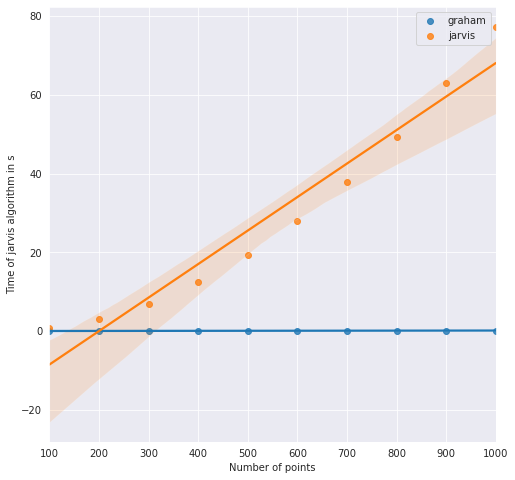

In [73]:
x = 'Number of points'
y_1 = 'Time of graham algorithm in s'
y_2 = 'Time of jarvis algorithm in s'
plt.figure(figsize=(8,8))
sns.regplot(data=time_comparison_df_b, x=x, y=y_1, label='graham')
sns.regplot(data=time_comparison_df_b, x=x, y=y_2, label='jarvis')
plt.legend(loc="best")

**c)**

In [74]:
def time_comparison_on_rectangle():
    columns = ["Number of points", "vertices", "Time of graham algorithm in s", "Time of jarvis algorithm in s",
               "Faster algorithm", "Time comparison in s"]
    # 'in s' oznacza czas w sekundach
    
    data = []
    for i in range(1, 11):
        x_1 = np.random.randint(-50, 40)
        x_2 = np.random.randint(-50, 40)
        y_1 = np.random.randint(-50, 40)
        y_2 = np.random.randint(-50, 40)
        vertices = [(x_1, y_1), (x_1, y_2), (x_2, y_1), (x_2, y_2)]
        num_of_points = i * np.random.randint(i*40, i*80)
        new_data = random_points_on_the_rectangle(num_of_points, vertices)
        new_df = pd.DataFrame(data=new_data, columns=['X', 'Y'])
        graham_time = count_time(graham_algorithm, new_df)
        jarvis_time = count_time(jarvis_algorithm, new_df)

        faster_algorithm = None
        if graham_time < jarvis_time:
            faster_algorithm = graham_algorithm.__name__
        else:
            faster_algorithm = jarvis_algorithm.__name__

        time_comparison = abs(graham_time - jarvis_time)
        data.append((num_of_points, vertices, graham_time, jarvis_time, faster_algorithm, time_comparison))
    return pd.DataFrame(data=data, columns=columns)

In [75]:
time_comparison_df_c = time_comparison_on_rectangle()
time_comparison_df_c

,Number of points,vertices,Time of graham algorithm in s,Time of jarvis algorithm in s,Faster algorithm,Time comparison in s
0,65,"[(-34, 9), (-34, 3), (20, 9), (20, 3)]",0.009803,0.028006,graham_algorithm,0.018203
1,246,"[(-40, -6), (-40, -49), (-19, -6), (-19, -49)]",0.033564,0.090054,graham_algorithm,0.056490
2,591,"[(-14, -2), (-14, 5), (-27, -2), (-27, 5)]",0.076145,0.216964,graham_algorithm,0.140818
3,1232,"[(3, -23), (3, -18), (24, -23), (24, -18)]",0.171297,0.449845,graham_algorithm,0.278548
4,1720,"[(30, -33), (30, -43), (32, -33), (32, -43)]",0.240785,0.625336,graham_algorithm,0.384551
5,1458,"[(-42, -50), (-42, -43), (-14, -50), (-14, -43)]",0.195427,0.537227,graham_algorithm,0.341800
6,2814,"[(-16, -45), (-16, -49), (36, -45), (36, -49)]",0.380774,1.020010,graham_algorithm,0.639236
7,3176,"[(-1, -7), (-1, -16), (-33, -7), (-33, -16)]",0.437426,1.176045,graham_algorithm,0.738619
8,4923,"[(9, 29), (9, -20), (36, 29), (36, -20)]",0.685206,1.788993,graham_algorithm,1.103787
9,6800,"[(-14, -13), (-14, -11), (-3, -13), (-3, -11)]",0.962418,2.495156,graham_algorithm,1.532738


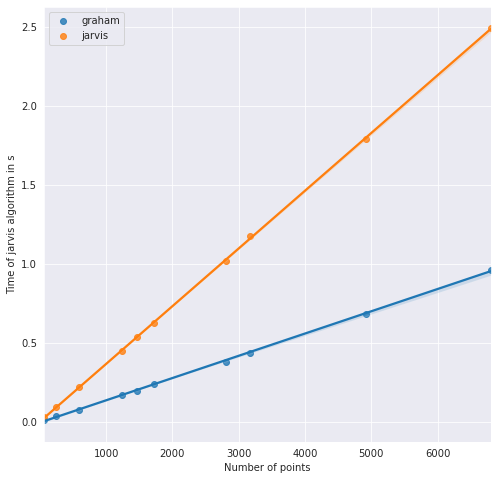

In [76]:
x = 'Number of points'
y_1 = 'Time of graham algorithm in s'
y_2 = 'Time of jarvis algorithm in s'
plt.figure(figsize=(8,8))
sns.regplot(data=time_comparison_df_c, x=x, y=y_1, label='graham')
sns.regplot(data=time_comparison_df_c, x=x, y=y_2, label='jarvis')
plt.legend(loc="best")

**d)**

In [77]:
def time_comparison_on_square():
    columns = ["Side number of points", "Diagonal number of points", "vertices", "Time of graham algorithm in s",
               "Time of jarvis algorithm in s", "Faster algorithm", "Time comparison in s"]
    # 'in s' oznacza czas w sekundach
    
    data = []
    for i in range(1, 11):
        x_1 = np.random.randint(-50, 40)
        x_2 = np.random.randint(-50, 40)
        side = abs(x_2 - x_1)
        y = np.random.randint(-50, 40)
        vertices = [(x_1, y), (x_2, y), (x_1, y + side), (x_2, y + side)]
        side_num_of_points = i * 75
        diag_num_of_points = i * 25
        new_data = random_points_on_square(vertices, side_num_of_points, diag_num_of_points)
        new_df = pd.DataFrame(data=new_data, columns=['X', 'Y'])
        graham_time = count_time(graham_algorithm, new_df)
        jarvis_time = count_time(jarvis_algorithm, new_df)

        faster_algorithm = None
        if graham_time < jarvis_time:
            faster_algorithm = graham_algorithm.__name__
        else:
            faster_algorithm = jarvis_algorithm.__name__

        time_comparison = abs(graham_time - jarvis_time)
        data.append((side_num_of_points, diag_num_of_points, vertices, graham_time, jarvis_time, faster_algorithm,
                     time_comparison))
    return pd.DataFrame(data=data, columns=columns)

In [78]:
time_comparison_df_d = time_comparison_on_square()
time_comparison_df_d

,Side number of points,Diagonal number of points,vertices,Time of graham algorithm in s,Time of jarvis algorithm in s,Faster algorithm,Time comparison in s
0,75,25,"[(-36, 36), (-37, 36), (-36, 37), (-37, 37)]",0.016094,0.044265,graham_algorithm,0.028171
1,150,50,"[(-6, -7), (-42, -7), (-6, 29), (-42, 29)]",0.030706,0.077415,graham_algorithm,0.046710
2,225,75,"[(-22, 19), (-3, 19), (-22, 38), (-3, 38)]",0.040437,0.112215,graham_algorithm,0.071778
3,300,100,"[(-25, -36), (19, -36), (-25, 8), (19, 8)]",0.053640,0.147375,graham_algorithm,0.093734
4,375,125,"[(-49, 8), (-37, 8), (-49, 20), (-37, 20)]",0.067384,0.183324,graham_algorithm,0.115941
5,450,150,"[(-27, 1), (29, 1), (-27, 57), (29, 57)]",0.081287,0.219326,graham_algorithm,0.138039
6,525,175,"[(-39, -48), (8, -48), (-39, -1), (8, -1)]",0.107563,0.258467,graham_algorithm,0.150904
7,600,200,"[(-31, -20), (22, -20), (-31, 33), (22, 33)]",0.110301,0.292308,graham_algorithm,0.182007
8,675,225,"[(22, 14), (30, 14), (22, 22), (30, 22)]",0.124545,0.330300,graham_algorithm,0.205756
9,750,250,"[(0, 33), (5, 33), (0, 38), (5, 38)]",0.139081,0.369169,graham_algorithm,0.230088


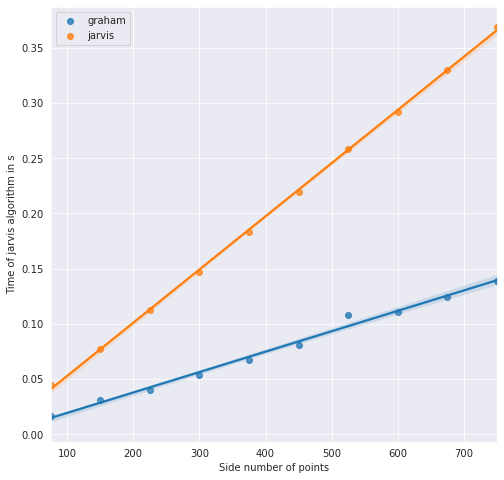

In [79]:
x = 'Side number of points'
y_1 = 'Time of graham algorithm in s'
y_2 = 'Time of jarvis algorithm in s'
plt.figure(figsize=(8,8))
ax = sns.regplot(data=time_comparison_df_d, x=x, y=y_1, label='graham')
sns.regplot(data=time_comparison_df_d, x=x, y=y_2, label='jarvis')
plt.legend(loc="best")